In [ ]:
############NOTEBOOK CONTENTS:
1. FOR SPEED WE HAVE USED CUDA AND CUML
2. THIS NOTEBOOK HAS THE CODE TO LOAD THE HUGE GB OF DATA FROM THE DRIVE
3. IT HAS THE LOGICS TO ACHIEVE THE HYPERPARAMETER TUNING USING THE VALIDATION SET
4. IT HAS CODES FOR VARIOUS MODELS AND THEIR RESULTS FOR THREE DIFFERENT SEEDS FOR COMPARISON.
5. TO PROVE/DISPROVE THE HYPOTHESIS, A SEPERATE SET OF RUNS IS PERFORMED BY EXCLUDING THE TOPOLOGICAL INFORMATION.
6. IT CONSISTS OF LOGIC TO ELIMINATE THE OUTLIERS USING THE IQR. HOWEVER, WE LOSE 98% OF DATA WITH THIS APPROACH. A DETAILED DESCRIPTION
IS GIVEN IN THE REPORT.
7. MEAN SQUARED ERROR, MEAN ABSOLUTE ERROR AND ROOT MEAN SQUARED ERROR ARE USED FOR EVALUATION.
8. PLOTS ARE IN THE REPORT.
9. SCALING IS PERFORMED FOR SOME MODELS WHICH REQUIRE SCALING SUCH AS RIDGE/LASSO.
10. DATA BELONG TO YEAR 2017 IS THE HELD OUT TEST SET.
11. ALL THE MISSING VALUES ARE REPLACED BY FOLLOWING THE PROCEDURES.


In [ ]:
######################EXTRACT THE READYMADE FILE FROM THE DRIVE###########3
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileId = drive.CreateFile({'id': '1KZn3m09-C1NoDOYRKoLN30O9RoOFunbP'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
fileId.GetContentFile('features_array.csv')


In [ ]:





##############cuml installation for faster access#############

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py



Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 1.08 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.1 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)


Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/rep

In [ ]:
# This will install CondaColab.  This will restart the kernel one last time.
# Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'


Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 40.0.1
Uninstalling cryptography-40.0.1:
  Successfully uninstalled cryptography-40.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 4.0 MB/s eta 0:00:00
Installing RAPIDS Stable 23.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-

In [ ]:
import cudf, cuml, cugraph, cuspatial
import pandas as pd
import cudf
import cuml

from sklearn.metrics import accuracy_score
from sklearn import model_selection, datasets

from cuml.dask.common import utils as dask_utils
from dask.distributed import Client, wait
from dask_cuda import LocalCUDACluster
import dask_cudf

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00


In [ ]:
#########REMOVE ACQ_DATE, ACQ_COLUMN_NEIGHBOUD_ACQ_TIME, NEIGHBOUR_SHAPE, SHAPE, MAY BE LONGITUDE AND LATITUDE,

In [ ]:
import optuna

In [ ]:
######SINCE THE DATASET IS PRETTY HUGE, WE NEED TO USE THE CHUNKS TO READ IT
#### Define the chunk size and total number of rows we want to keep,Initialize an empty list to store sampled rows from each chunk


chunk_size = 1000000
target_rows = 5000000


sampled_data_list = []

# Keep track of total sampled rows
total_sampled = 0

chunk_iter = pd.read_csv('features_array.csv', chunksize=chunk_size, sep="\t", index_col=False)

for chunk in chunk_iter:

    shuffled_chunk = chunk.sample(frac=1, random_state=42)


    remaining_rows = target_rows - total_sampled
    sample_size = min(len(shuffled_chunk), remaining_rows)

    sampled_chunk = shuffled_chunk.head(sample_size)
    sampled_data_list.append(sampled_chunk)

    total_sampled += sample_size


    if total_sampled >= target_rows:
        break


##########FINALLY OBTAIN THE SAMPLED DATA##############
sampled_data = pd.concat(sampled_data_list, ignore_index=True)


<ipython-input-3-e98108b8faaf>:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  for chunk in chunk_iter:
<ipython-input-3-e98108b8faaf>:17: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
<ipython-input-3-e98108b8faaf>:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  for chunk in chunk_iter:
<ipython-input-3-e98108b8faaf>:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  for chunk in chunk_iter:
<ipython-input-3-e98108b8faaf>:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  for chunk in chunk_iter:
<ipython-input-3-e98108b8faaf>:17: ParserWarning: Length of header or names does not match lengt

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(len(sampled_data))

5000000


In [ ]:
########we have data from 2012-2017.
#Let us use 2017 as test set
data_2017 = sampled_data[sampled_data['acq_date'].str.startswith("2017")]




In [ ]:
print(len(data_2017))


1047826


In [ ]:
#####REMOVE 2017 ENTRIES FROM THE DATASET################

sampled_data_without_2017 = sampled_data[~sampled_data['acq_date'].str.startswith("2017")]


In [ ]:

sampled_data_without_2017.head()

In [ ]:
##########SINCE I HAVE MANY COLUMNS, I NEED TO DISPLAY ALL COLUMNS
import pandas as pd

pd.set_option('display.max_columns', None)


sampled_data_without_2017.head()


In [ ]:
print(len(sampled_data_without_2017))

3952174


In [ ]:
#########################HYPOTHESIS TESTING

In [ ]:
##############THIS WILL BE RUN ONLY TO DROP THE TOPOGRAPHICAL DATA#############
columns_to_drop = ["acq_time", "Shape","Neighbour_Shape","Neighbour_acq_time","TEMP_ave","ELEV_max","ELEV_min", "ELEV_median", "ELEV_sum","ELEV_mode","ELEV_count", "ELEV_mean", "SLP_max", "SLP_min","SLP_median",	"SLP_sum", "SLP_mode", "SLP_count","SLP_mean" ,"Neighbour_ELEV_max","Neighbour_ELEV_min",	"Neighbour_ELEV_median","Neighbour_ELEV_sum",	"Neighbour_ELEV_mode","Neighbour_ELEV_count","Neighbour_ELEV_mean","Neighbour_SLP_max","Neighbour_SLP_min","Neighbour_SLP_median", "Neighbour_SLP_sum",	"Neighbour_SLP_mode","Neighbour_SLP_count","Neighbour_SLP_mean"]
sampled_data_without_2017 = sampled_data_without_2017.drop(columns=columns_to_drop)


In [ ]:
###################################run this only if the hypothesis needs to be tested

In [ ]:
#######Lets drop the acq_time and shape
columns_to_drop = ["acq_time", "Shape","Neighbour_Shape","Neighbour_acq_time","TEMP_ave"]
sampled_data_without_2017 = sampled_data_without_2017.drop(columns=columns_to_drop)



In [ ]:
#########Lets us next split the values
sampled_data_without_2017['frp'] = sampled_data_without_2017['frp'].str.split(',').str[0]
sampled_data_without_2017['Neighbour_frp'] = sampled_data_without_2017['Neighbour_frp'].str.split(',').str[0]
sampled_data_without_2017['Neighbour_frp']=sampled_data_without_2017['Neighbour_frp'].astype(float)
sampled_data_without_2017['frp']=sampled_data_without_2017['frp'].astype(float)

In [ ]:
sampled_data_without_2017.head()

,Polygon_ID,acq_date,frp,Neighbour,Neighbour_frp,EVT_max,EVT_min,EVT_median,EVT_sum,EVT_mode,EVT_count,EVT_mean,EVH_max,EVH_min,EVH_median,EVH_sum,EVH_mode,EVH_count,EVH_mean,EVC_max,EVC_min,EVC_median,EVC_sum,EVC_mode,EVC_count,EVC_mean,CBD_max,CBD_min,CBD_median,CBD_sum,CBD_mode,CBD_count,CBD_mean,CBH_max,CBH_min,CBH_median,CBH_sum,CBH_mode,CBH_count,CBH_mean,CC_max,CC_min,CC_median,CC_sum,CC_mode,CC_count,CC_mean,CH_max,CH_min,CH_median,CH_sum,CH_mode,CH_count,CH_mean,c_latitude,c_longitude,Neighbour_EVT_max,Neighbour_EVT_min,Neighbour_EVT_median,Neighbour_EVT_sum,Neighbour_EVT_mode,Neighbour_EVT_count,Neighbour_EVT_mean,Neighbour_EVH_max,Neighbour_EVH_min,Neighbour_EVH_median,Neighbour_EVH_sum,Neighbour_EVH_mode,Neighbour_EVH_count,Neighbour_EVH_mean,Neighbour_EVC_max,Neighbour_EVC_min,Neighbour_EVC_median,Neighbour_EVC_sum,Neighbour_EVC_mode,Neighbour_EVC_count,Neighbour_EVC_mean,Neighbour_CBD_max,Neighbour_CBD_min,Neighbour_CBD_median,Neighbour_CBD_sum,Neighbour_CBD_mode,Neighbour_CBD_count,Neighbour_CBD_mean,Neighbour_CBH_max,Neighbour_CBH_min,Neighbour_CBH_median,Neighbour_CBH_sum,Neighbour_CBH_mode,Neighbour_CBH_count,Neighbour_CBH_mean,Neighbour_CC_max,Neighbour_CC_min,Neighbour_CC_median,Neighbour_CC_sum,Neighbour_CC_mode,Neighbour_CC_count,Neighbour_CC_mean,Neighbour_CH_max,Neighbour_CH_min,Neighbour_CH_median,Neighbour_CH_sum,Neighbour_CH_mode,Neighbour_CH_count,Neighbour_CH_mean,Neighbour_c_latitude,Neighbour_c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
0,5305908,2012-09-06,3.4,5305909.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,111.0,110.0,110.5,31866.0,111.0,288.0,110.645836,106.0,103.0,104.0,30074.0,105.0,288.0,104.423615,12.0,5.0,12.0,2364.0,6.0,288.0,8.208333,15.0,5.0,7.5,2440.0,6.0,288.0,8.472222,65.0,35.0,50.0,14180.0,45.0,288.0,49.236110,375.0,175.0,275.0,87600.0,375.0,288.0,304.16666,-2.099051e+06,2.183505e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,111.0,110.0,110.5,34460.0,111.0,312.0,110.448715,106.0,102.0,103.5,32524.0,102.0,312.0,104.24359,12.0,4.0,8.0,2504.0,6.0,312.0,8.025641,15.0,5.0,6.0,2642.0,15.0,312.0,8.467949,65.0,25.0,50.0,14800.0,45.0,312.0,47.435898,375.0,175.0,375.0,82600.0,375.0,312.0,264.743600,-2.099051e+06,2.183130e+06,25.8,14.3,28.4,0.0,0.0,176.0,10.1,1012.3
1,73260419,2016-02-13,1.0,73252678.0,NaN,359.0,11.0,152.5,52382.0,161.0,338.0,154.97633,310.0,11.0,212.0,45256.0,305.0,338.0,133.893500,9823.0,7191.0,8517.5,2889012.0,9322.0,338.0,8547.373000,100.0,0.0,50.0,10650.0,0.0,338.0,31.508875,22.0,0.0,3.0,544.0,0.0,338.0,1.609468,75.0,0.0,27.5,6770.0,0.0,338.0,20.029585,230.0,0.0,0.0,21300.0,0.0,338.0,63.01775,1.192324e+06,1.067130e+06,180.0,64.0,114.0,36150.0,161.0,288.0,125.520836,124.0,64.0,89.5,28070.0,117.0,288.0,97.465280,9322.0,7347.0,7994.0,2487046.0,7994.0,288.0,8635.57600,100.0,0.0,100.0,16240.0,0.0,288.0,56.388890,22.0,0.0,2.5,924.0,0.0,288.0,3.208333,85.0,0.0,40.0,10340.0,0.0,288.0,35.902780,230.0,0.0,210.0,35360.0,0.0,288.0,122.777780,1.191949e+06,1.066755e+06,9.1,4.5,14.1,0.0,0.0,334.8,14.2,1026.0
2,24429039,2012-06-29,1.0,24429038.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,110.0,101.0,105.5,16736.0,109.0,156.0,107.282050,125.0,102.0,114.0,17011.0,102.0,156.0,109.044870,19.0,0.0,2.5,370.0,0.0,156.0,2.371795,100.0,0.0,26.5,5252.0,0.0,156.0,33.666668,45.0,0.0,12.5,3210.0,0.0,156.0,20.576923,175.0,0.0,125.0,17750.0,0.0,156.0,113.78205,-1.172801e+06,2.036880e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,110.0,101.0,110.0,15452.0,109.0,144.0,107.305560,125.0,101.0,102.5,15661.0,102.0,144.0,108.75694,27.0,0.0,3.0,316.0,0.0,144.0,2.194444,100.0,0.0,0.0,5842.0,0.0,144.0,40.569443,45.0,0.0,35.0,2915.0,0.0,144.0,20.243055,175.0,0.0,0.0,16175.0,0.0,144.0,112.326385,-1.172801e+06,2.037255e+06,25.9,11.1,36.7,0.0,0.0,NaN,6.9,1011.0
3,53077476,2015-12-05,9.5,53069734.0,NaN,100.0,0.0,55.0,4631.0,0.0,144.0,32.15972,30.0,0.0,15.0,2887.0,0.0,144.0,20.048610,85.0,0.0,0.0,11080.0,0.0,144.0,76.944440,108.0,25.0,108.0,14691.0,108.0,144.0,102.020836,110.0,25.0,110.0,14990.0,25.0,144.0,104.097220

In [ ]:
########### FROM TRAINING SET#########
columns_with_null_train =sampled_data_without_2017.columns[sampled_data_without_2017.isnull().any()].tolist()

print(columns_with_null_train)



['Neighbour_frp', 'Neighbour_EVT_max', 'Neighbour_EVT_min', 'Neighbour_EVT_median', 'Neighbour_EVT_sum', 'Neighbour_EVT_mode', 'Neighbour_EVT_count', 'Neighbour_EVT_mean', 'Neighbour_EVH_max', 'Neighbour_EVH_min', 'Neighbour_EVH_median', 'Neighbour_EVH_sum', 'Neighbour_EVH_mode', 'Neighbour_EVH_count', 'Neighbour_EVH_mean', 'Neighbour_EVC_max', 'Neighbour_EVC_min', 'Neighbour_EVC_median', 'Neighbour_EVC_sum', 'Neighbour_EVC_mode', 'Neighbour_EVC_count', 'Neighbour_EVC_mean', 'Neighbour_CBD_max', 'Neighbour_CBD_min', 'Neighbour_CBD_median', 'Neighbour_CBD_sum', 'Neighbour_CBD_mode', 'Neighbour_CBD_count', 'Neighbour_CBD_mean', 'Neighbour_CBH_max', 'Neighbour_CBH_min', 'Neighbour_CBH_median', 'Neighbour_CBH_sum', 'Neighbour_CBH_mode', 'Neighbour_CBH_count', 'Neighbour_CBH_mean', 'Neighbour_CC_max', 'Neighbour_CC_min', 'Neighbour_CC_median', 'Neighbour_CC_sum', 'Neighbour_CC_mode', 'Neighbour_CC_count', 'Neighbour_CC_mean', 'Neighbour_CH_max', 'Neighbour_CH_min', 'Neighbour_CH_median', 'N

In [ ]:

#################mean values replacement
mean_values_train = sampled_data_without_2017[columns_with_null_train].mean()


sampled_data_without_2017[columns_with_null_train] = sampled_data_without_2017[columns_with_null_train].fillna(mean_values_train)



In [ ]:
#################median values replacement
median_values_train = sampled_data_without_2017[columns_with_null_train].median()


sampled_data_without_2017[columns_with_null_train] = sampled_data_without_2017[columns_with_null_train].fillna(median_values_train)



In [ ]:
#####Lets check again if the NAN is getting replaced now###
columns_with_null_train =sampled_data_without_2017.columns[sampled_data_without_2017.isnull().any()].tolist()

print(columns_with_null_train)

[]


In [ ]:
####The answer is yes. The only column left out is the TEMP_AVE which is totally empty. Hence, we will drop this


In [ ]:
sampled_data_without_2017.head()

,Polygon_ID,acq_date,frp,Neighbour,Neighbour_frp,EVT_max,EVT_min,EVT_median,EVT_sum,EVT_mode,EVT_count,EVT_mean,EVH_max,EVH_min,EVH_median,EVH_sum,EVH_mode,EVH_count,EVH_mean,EVC_max,EVC_min,EVC_median,EVC_sum,EVC_mode,EVC_count,EVC_mean,CBD_max,CBD_min,CBD_median,CBD_sum,CBD_mode,CBD_count,CBD_mean,CBH_max,CBH_min,CBH_median,CBH_sum,CBH_mode,CBH_count,CBH_mean,CC_max,CC_min,CC_median,CC_sum,CC_mode,CC_count,CC_mean,CH_max,CH_min,CH_median,CH_sum,CH_mode,CH_count,CH_mean,c_latitude,c_longitude,Neighbour_EVT_max,Neighbour_EVT_min,Neighbour_EVT_median,Neighbour_EVT_sum,Neighbour_EVT_mode,Neighbour_EVT_count,Neighbour_EVT_mean,Neighbour_EVH_max,Neighbour_EVH_min,Neighbour_EVH_median,Neighbour_EVH_sum,Neighbour_EVH_mode,Neighbour_EVH_count,Neighbour_EVH_mean,Neighbour_EVC_max,Neighbour_EVC_min,Neighbour_EVC_median,Neighbour_EVC_sum,Neighbour_EVC_mode,Neighbour_EVC_count,Neighbour_EVC_mean,Neighbour_CBD_max,Neighbour_CBD_min,Neighbour_CBD_median,Neighbour_CBD_sum,Neighbour_CBD_mode,Neighbour_CBD_count,Neighbour_CBD_mean,Neighbour_CBH_max,Neighbour_CBH_min,Neighbour_CBH_median,Neighbour_CBH_sum,Neighbour_CBH_mode,Neighbour_CBH_count,Neighbour_CBH_mean,Neighbour_CC_max,Neighbour_CC_min,Neighbour_CC_median,Neighbour_CC_sum,Neighbour_CC_mode,Neighbour_CC_count,Neighbour_CC_mean,Neighbour_CH_max,Neighbour_CH_min,Neighbour_CH_median,Neighbour_CH_sum,Neighbour_CH_mode,Neighbour_CH_count,Neighbour_CH_mean,Neighbour_c_latitude,Neighbour_c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
0,5305908,2012-09-06,3.4,5305909.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,111.0,110.0,110.5,31866.0,111.0,288.0,110.645836,106.0,103.0,104.0,30074.0,105.0,288.0,104.423615,12.0,5.0,12.0,2364.0,6.0,288.0,8.208333,15.0,5.0,7.5,2440.0,6.0,288.0,8.472222,65.0,35.0,50.0,14180.0,45.0,288.0,49.236110,375.0,175.0,275.0,87600.0,375.0,288.0,304.16666,-2.099051e+06,2.183505e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,111.0,110.0,110.5,34460.0,111.0,312.0,110.448715,106.0,102.0,103.5,32524.0,102.0,312.0,104.24359,12.0,4.0,8.0,2504.0,6.0,312.0,8.025641,15.0,5.0,6.0,2642.0,15.0,312.0,8.467949,65.0,25.0,50.0,14800.0,45.0,312.0,47.435898,375.0,175.0,375.0,82600.0,375.0,312.0,264.743600,-2.099051e+06,2.183130e+06,25.8,14.3,28.4,0.0,0.0,176.0,10.1,1012.3
1,73260419,2016-02-13,1.0,73252678.0,2.4,359.0,11.0,152.5,52382.0,161.0,338.0,154.97633,310.0,11.0,212.0,45256.0,305.0,338.0,133.893500,9823.0,7191.0,8517.5,2889012.0,9322.0,338.0,8547.373000,100.0,0.0,50.0,10650.0,0.0,338.0,31.508875,22.0,0.0,3.0,544.0,0.0,338.0,1.609468,75.0,0.0,27.5,6770.0,0.0,338.0,20.029585,230.0,0.0,0.0,21300.0,0.0,338.0,63.01775,1.192324e+06,1.067130e+06,180.0,64.0,114.0,36150.0,161.0,288.0,125.520836,124.0,64.0,89.5,28070.0,117.0,288.0,97.465280,9322.0,7347.0,7994.0,2487046.0,7994.0,288.0,8635.57600,100.0,0.0,100.0,16240.0,0.0,288.0,56.388890,22.0,0.0,2.5,924.0,0.0,288.0,3.208333,85.0,0.0,40.0,10340.0,0.0,288.0,35.902780,230.0,0.0,210.0,35360.0,0.0,288.0,122.777780,1.191949e+06,1.066755e+06,9.1,4.5,14.1,0.0,0.0,334.8,14.2,1026.0
2,24429039,2012-06-29,1.0,24429038.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,110.0,101.0,105.5,16736.0,109.0,156.0,107.282050,125.0,102.0,114.0,17011.0,102.0,156.0,109.044870,19.0,0.0,2.5,370.0,0.0,156.0,2.371795,100.0,0.0,26.5,5252.0,0.0,156.0,33.666668,45.0,0.0,12.5,3210.0,0.0,156.0,20.576923,175.0,0.0,125.0,17750.0,0.0,156.0,113.78205,-1.172801e+06,2.036880e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,110.0,101.0,110.0,15452.0,109.0,144.0,107.305560,125.0,101.0,102.5,15661.0,102.0,144.0,108.75694,27.0,0.0,3.0,316.0,0.0,144.0,2.194444,100.0,0.0,0.0,5842.0,0.0,144.0,40.569443,45.0,0.0,35.0,2915.0,0.0,144.0,20.243055,175.0,0.0,0.0,16175.0,0.0,144.0,112.326385,-1.172801e+06,2.037255e+06,25.9,11.1,36.7,0.0,0.0,195.7,6.9,1011.0
3,53077476,2015-12-05,9.5,53069734.0,2.4,100.0,0.0,55.0,4631.0,0.0,144.0,32.15972,30.0,0.0,15.0,2887.0,0.0,144.0,20.048610,85.0,0.0,0.0,11080.0,0.0,144.0,76.944440,108.0,25.0,108.0,14691.0,108.0,144.0,102.020836,110.0,25.0,110.0,14990.0,25.0,144.0,104.0972

In [ ]:
sampled_data_without_2017.shape

(3952174, 115)

In [ ]:
##########115 columns after eliminating the slope and elevation data for neighbors and datapoints

In [ ]:
###########BOX PLOT OF VARIABLES FROM TRAINING SET#########

In [ ]:


unique_values = sampled_data_without_2017['Neighbour_frp'].unique()

value_counts = sampled_data_without_2017 ['Neighbour_frp'].value_counts()

print("Unique values:", unique_values)
print("Value counts:", value_counts)

Unique values: [2.400e+00 4.000e-01 7.000e-01 ... 5.363e+02 1.784e+02 3.014e+02]
Value counts: 2.4      3604602
1.3        12023
1.1        11970
1.2        11806
1.4        11511
          ...   
470.5          1
284.3          1
181.1          1
97.2           1
301.4          1
Name: Neighbour_frp, Length: 2041, dtype: int64


In [ ]:
print(len(sampled_data_without_2017))

3952174


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


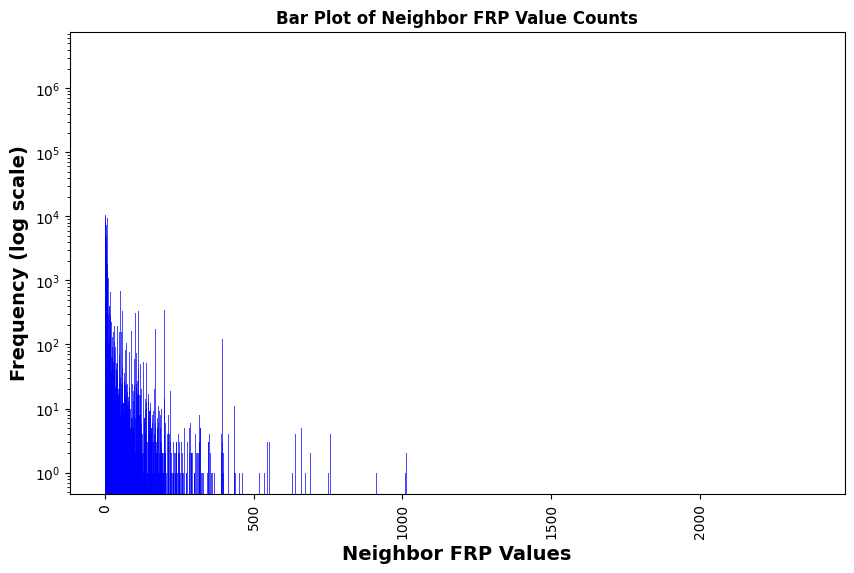

In [ ]:
############### Set up the figure, create the bar plot with a logarithmic y-axis


plt.figure(figsize=(10, 6))

plt.bar(unique_values, value_counts, color='blue', alpha=0.7)
plt.yscale('log')  # Set logarithmic scale on y-axis


plt.xlabel('Neighbor FRP Values',fontweight="bold",fontsize=14)
plt.ylabel('Frequency (log scale)',fontweight="bold",fontsize=14)
plt.title('Bar Plot of Neighbor FRP Value Counts',fontweight="bold")


plt.xticks(rotation=90)

plt.show()

In [ ]:
sampled_data_without_2017.head()

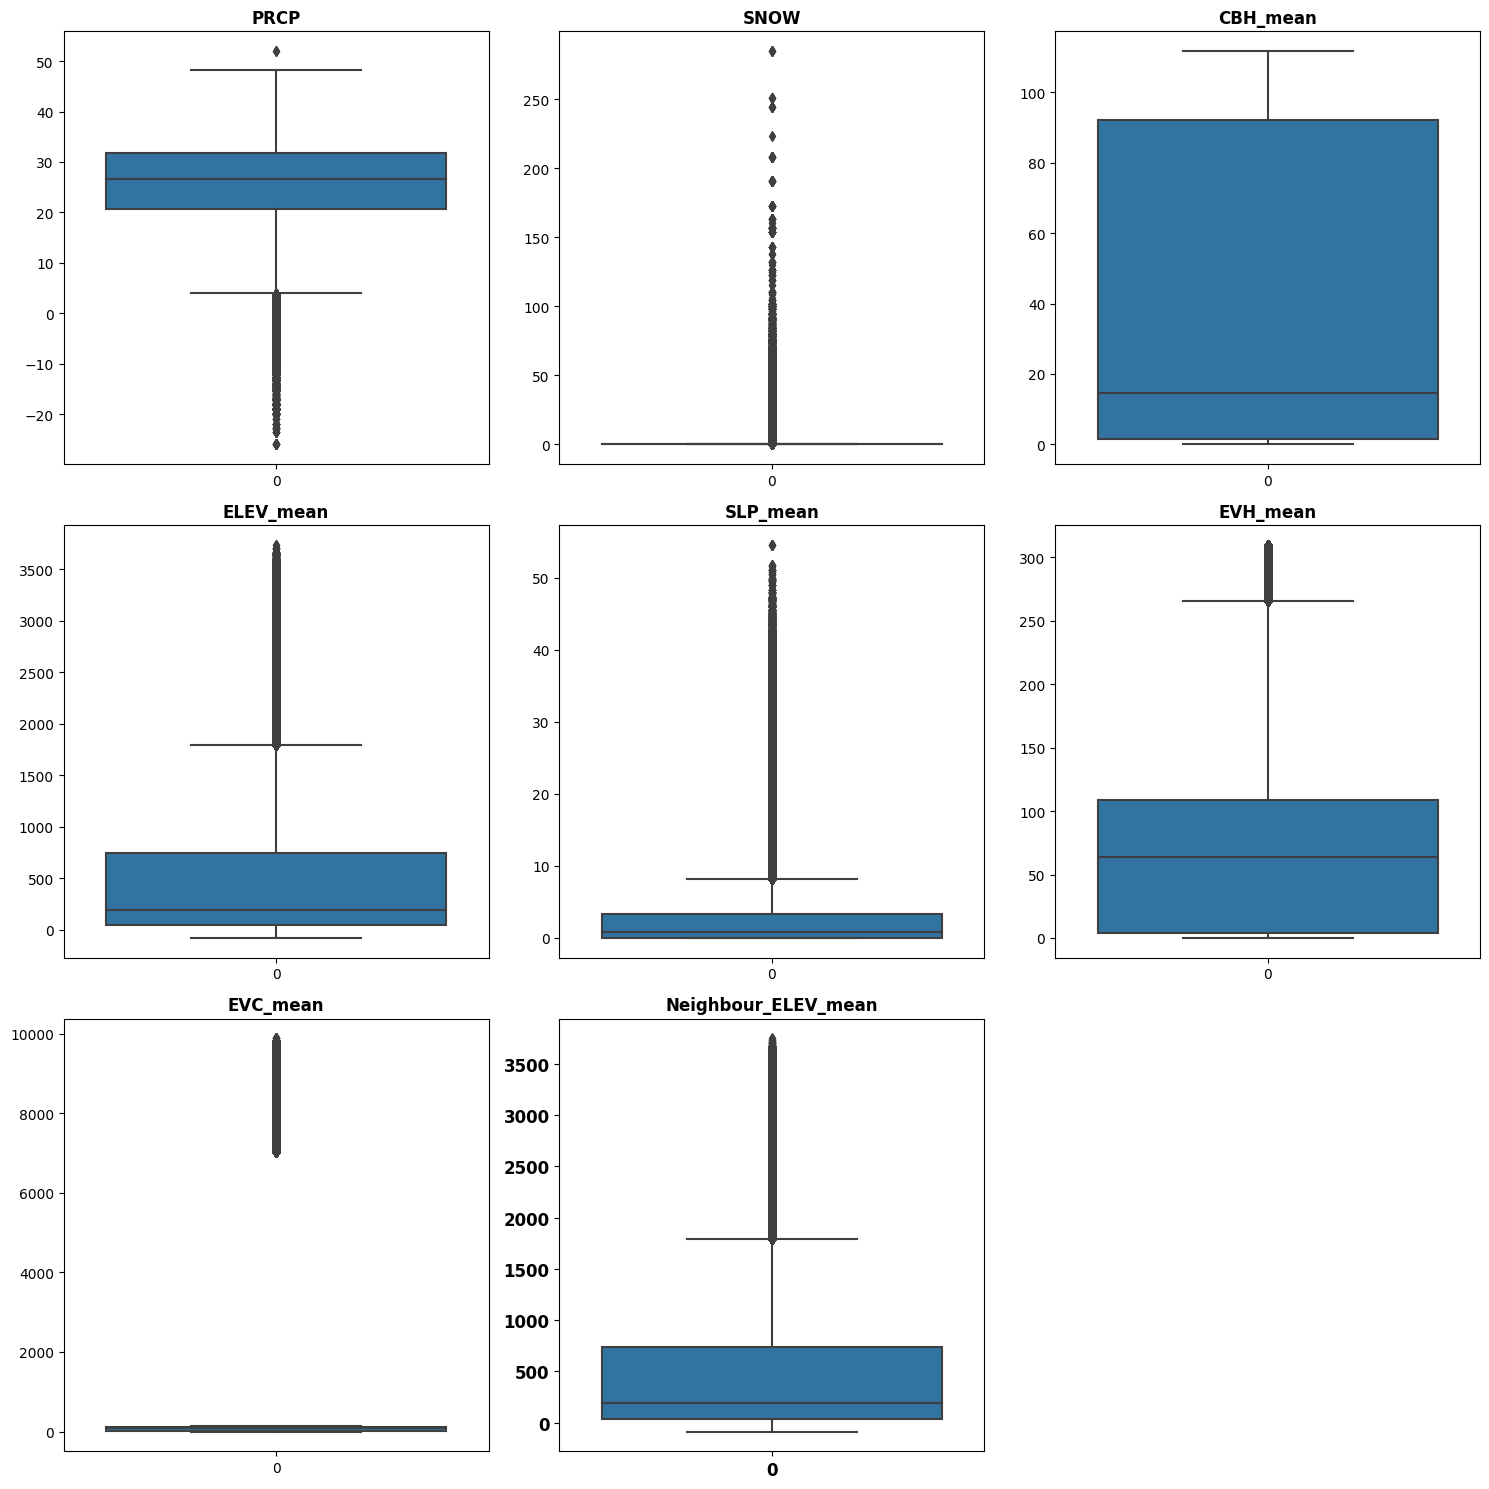

In [ ]:
##############BOX PLOT OF THE VARIABLES WITH OUTLIERS-BEFORE ELIMINATION#######
selected_columns = [
    'PRCP', 'SNOW', 'CBH_mean', 'ELEV_mean', 'SLP_mean',
    'EVH_mean', 'EVC_mean', 'Neighbour_ELEV_mean'
]

n_cols = 3
n_rows = len(selected_columns) // n_cols + (len(selected_columns) % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows), sharey=False)

axes = axes.flatten()

for i, column in enumerate(selected_columns):
    sns.boxplot(sampled_data_without_2017[column], ax=axes[i])
    axes[i].set_title(column,fontweight="bold")
    axes[i].set_xlabel('')
    axes[i].xaxis.label.set_weight('bold')
    axes[i].yaxis.label.set_weight('bold')



for i in range(len(selected_columns), n_cols * n_rows):
    fig.delaxes(axes[i])
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


In [ ]:
for column in selected_columns:
    print(f"Summary statistics for {column}:\n{sampled_data_without_2017[column].describe()}\n")

Summary statistics for PRCP:
count    3.952174e+06
mean     2.559948e+01
std      8.169114e+00
min     -2.600000e+01
25%      2.060000e+01
50%      2.670000e+01
75%      3.170000e+01
max      5.200000e+01
Name: PRCP, dtype: float64

Summary statistics for SNOW:
count    3.952174e+06
mean     4.941752e-01
std      3.327868e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.850000e+02
Name: SNOW, dtype: float64

Summary statistics for CBH_mean:
count    3.952174e+06
mean     3.936157e+01
std      4.360226e+01
min      0.000000e+00
25%      1.435898e+00
50%      1.459615e+01
75%      9.218343e+01
max      1.117500e+02
Name: CBH_mean, dtype: float64

Summary statistics for ELEV_mean:
count    3.952174e+06
mean     5.352656e+02
std      7.209930e+02
min     -7.986111e+01
25%      4.099359e+01
50%      1.955192e+02
75%      7.416217e+02
max      3.738648e+03
Name: ELEV_mean, dtype: float64

Summary statistics for SLP_mean:
count    3.952174

In [ ]:
#############Let us first see if there are any columns that might not be useful during the predictions


sampled_data_without_2017.head()

,Polygon_ID,acq_date,frp,Neighbour,Neighbour_frp,ELEV_max,ELEV_min,ELEV_median,ELEV_sum,ELEV_mode,...,Neighbour_c_latitude,Neighbour_c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
0,5305908,2012-09-06,3.4,5305909.0,2.4,0.0,0.0,0.0,0.0,0.0,...,-2.099051e+06,2.183130e+06,25.8,14.3,28.4,0.0,0.0,176.0,10.1,1012.3
1,73260419,2016-02-13,1.0,73252678.0,2.4,67.0,59.0,60.5,20684.0,66.0,...,1.191949e+06,1.066755e+06,9.1,4.5,14.1,0.0,0.0,334.8,14.2,1026.0
2,24429039,2012-06-29,1.0,24429038.0,2.4,2570.0,2478.0,2526.5,788498.0,2485.0,...,-1.172801e+06,2.037255e+06,25.9,11.1,36.7,0.0,0.0,195.7,6.9,1011.0
3,53077476,2015-12-05,9.5,53069734.0,2.4,135.0,99.0,103.0,16556.0,111.0,...,2.143238e+05,8.980054e+05,7.7,1.3,17.6,0.0,0.0,195.7,2.2,1030.7
4,53331981,2016-04-02,6.9,53339724.0,2.4,368.0,282.0,306.0,53377.0,305.0,...,2.274488e+05,1.265505e+06,11.0,2.2,20.0,0.0,0.0,269.5,7.4,1019.8


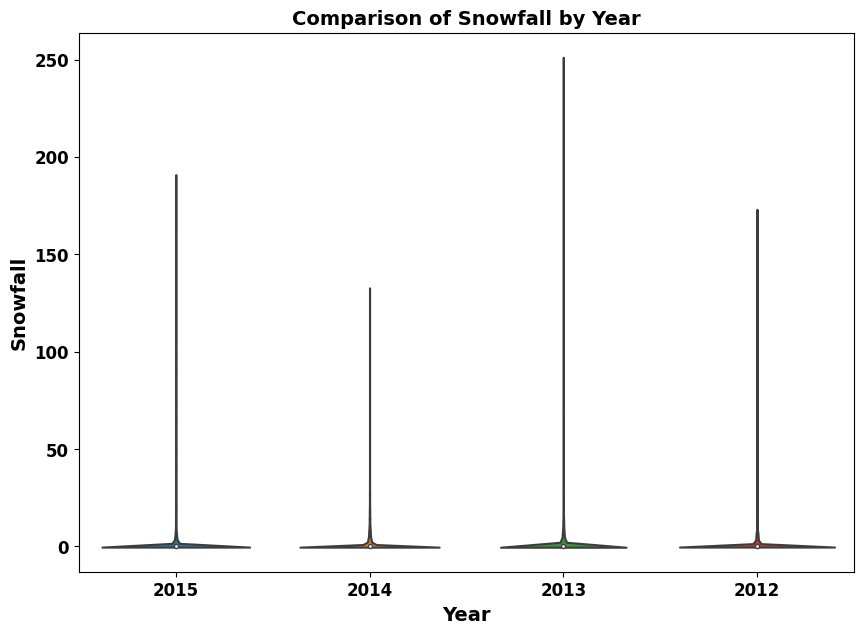

In [ ]:
##########Compare the violin plots of snowfall during the year 2016, 2015,2013,2012

data_frame_2015 = sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2015")]

data_frame_2013=sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2013")]
data_frame_2012=sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2012")]
data_frame_2014=sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2014")]

combined_data1 = pd.concat([
    data_frame_2015.assign(Year='2015'),
    data_frame_2014.assign(Year='2014'),
    data_frame_2013.assign(Year='2013'),

    data_frame_2012.assign(Year='2012')

])

plt.figure(figsize=(10, 7))
sns.violinplot(x='Year', y='SNOW', data=combined_data1)
plt.title('Comparison of Snowfall by Year',fontweight="bold",fontsize=14)
plt.xlabel('Year',fontweight="bold",fontsize=14)
plt.ylabel('Snowfall',fontweight="bold",fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()












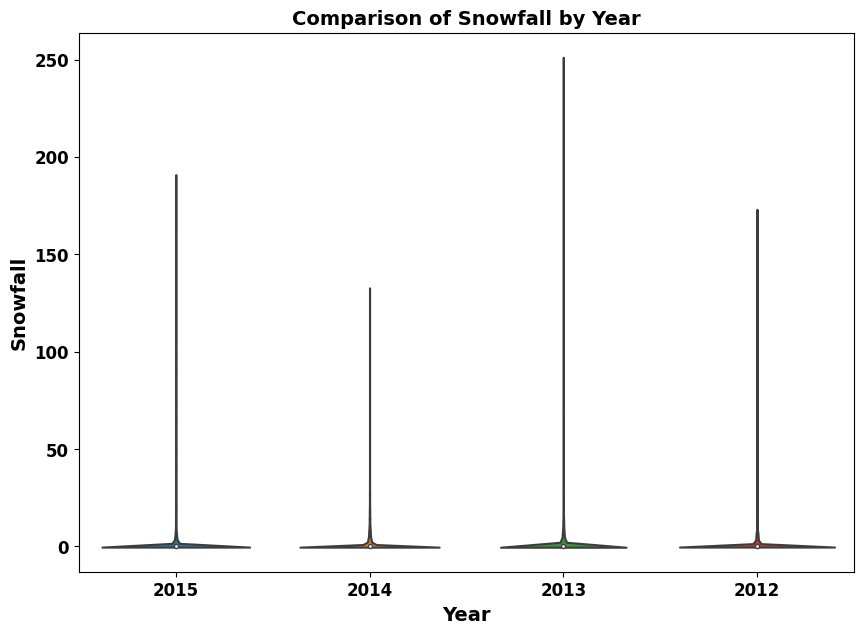

In [ ]:
#########VIOLIN PLOTS OF SNOW BY YEAR##########


plt.figure(figsize=(10, 7))
sns.violinplot(x='Year', y='SNOW', data=combined_data1)
plt.title('Comparison of Snowfall by Year',fontweight="bold",fontsize=14)
plt.xlabel('Year',fontweight="bold",fontsize=14)
plt.ylabel('Snowfall',fontweight="bold",fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()



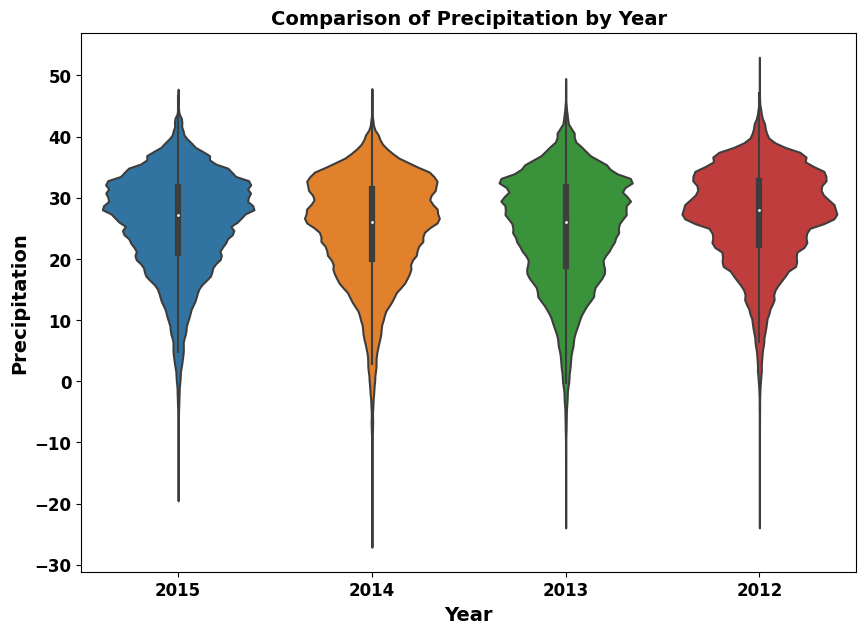

In [ ]:
#########VIOLIN PLOTS OF PRECIPITATION BY YEAR##########


plt.figure(figsize=(10, 7))
sns.violinplot(x='Year', y='PRCP', data=combined_data1)
plt.title('Comparison of Precipitation by Year',fontweight="bold",fontsize=14)
plt.xlabel('Year',fontweight="bold",fontsize=14)
plt.ylabel('Precipitation',fontweight="bold",fontsize=14)

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()




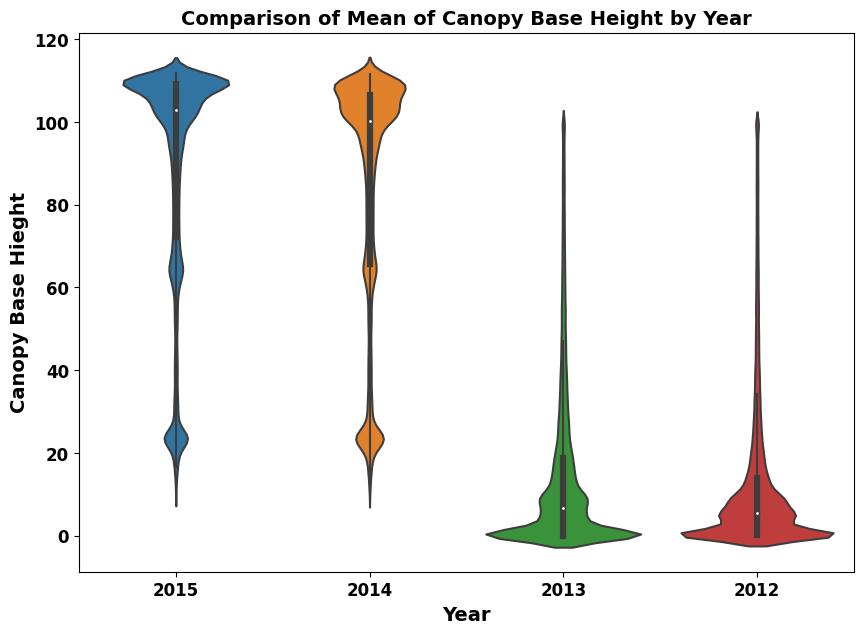

In [ ]:
#########VIOLIN PLOTS OF MEAN OF CNOPY BASE HEIGHT BY YEAR##########

plt.figure(figsize=(10, 7))
sns.violinplot(x='Year', y='CBH_mean', data=combined_data1)
plt.title('Comparison of Mean of Canopy Base Height by Year',fontweight="bold",fontsize=14)
plt.xlabel('Year',fontweight="bold",fontsize=14)
plt.ylabel('Canopy Base Hieght',fontweight="bold",fontsize=14)

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()



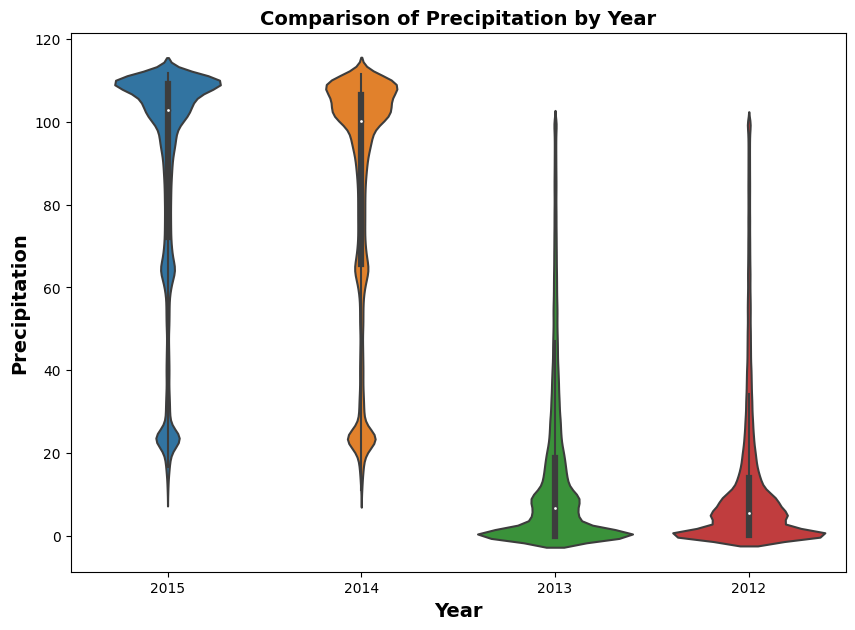

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Year', y='CBH_mean', data=combined_data1)
plt.title('Comparison of Precipitation by Year',fontweight="bold",fontsize=14)
plt.xlabel('Year',fontweight="bold",fontsize=14)
plt.ylabel('Precipitation',fontweight="bold",fontsize=14)
plt.show()


In [ ]:
#############LETS ANALYZE THE DISTRIBUTION OF THE DATA###########
import numpy as np
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

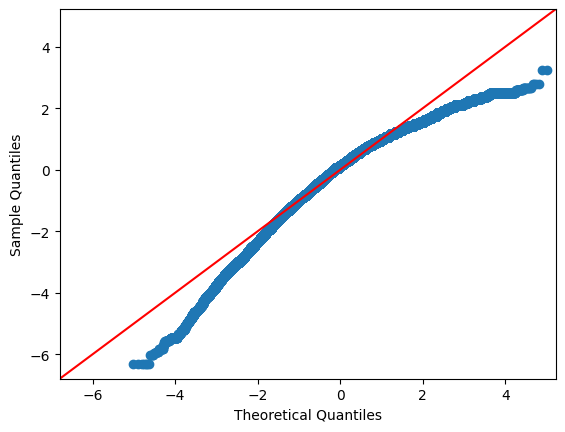

In [ ]:
sm.qqplot(sampled_data_without_2017["PRCP"], line ='45',fit=True,dist=stats.norm)
py.show()

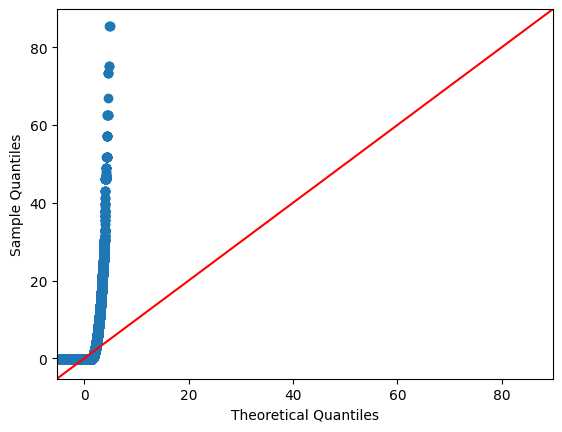

In [ ]:
sm.qqplot(sampled_data_without_2017["SNOW"], line ='45',fit=True,dist=stats.norm)
py.show()

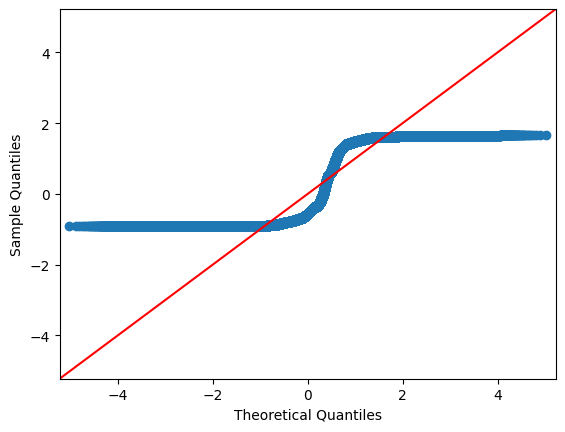

In [ ]:
sm.qqplot(sampled_data_without_2017["CBH_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

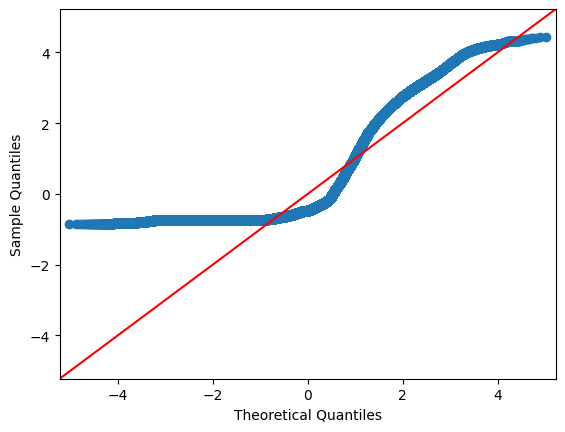

In [ ]:
sm.qqplot(sampled_data_without_2017["ELEV_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

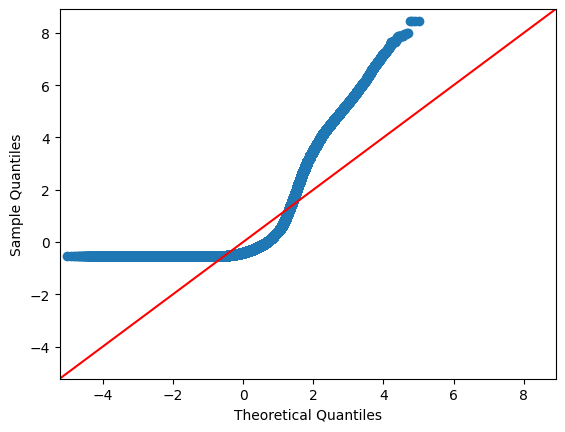

In [ ]:
sm.qqplot(sampled_data_without_2017["SLP_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

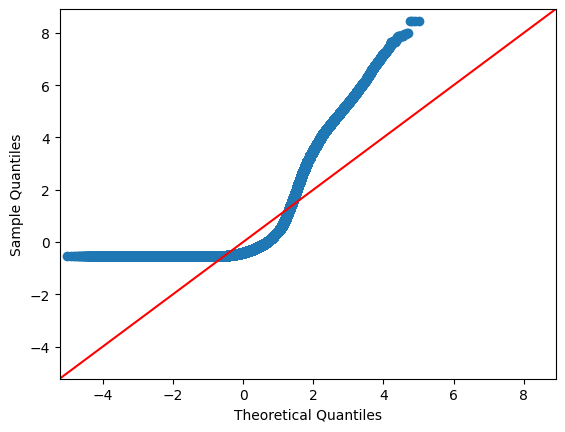

In [ ]:
sm.qqplot(sampled_data_without_2017["SLP_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

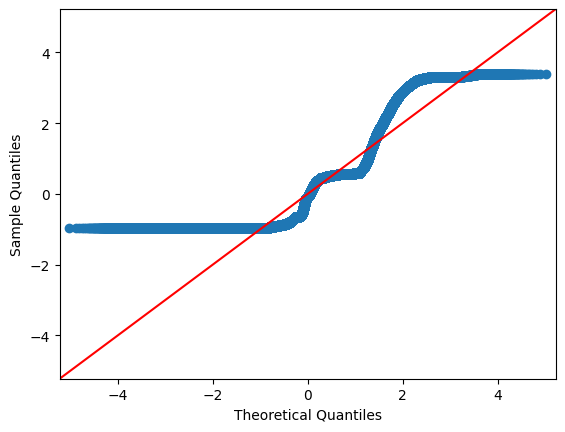

In [ ]:
sm.qqplot(sampled_data_without_2017["EVH_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

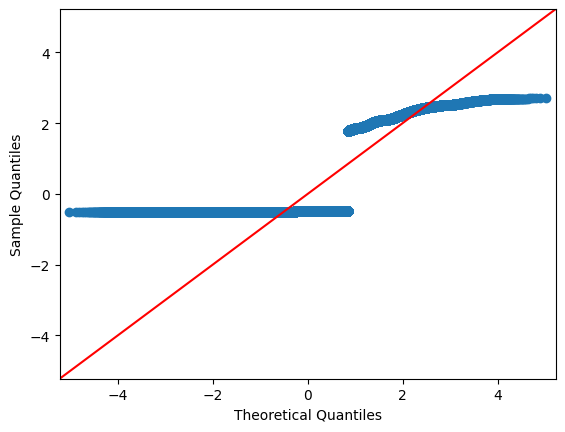

In [ ]:
sm.qqplot(sampled_data_without_2017["EVC_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

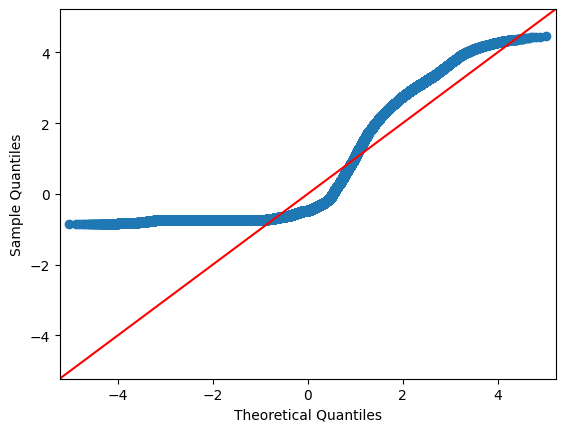

In [ ]:
sm.qqplot(sampled_data_without_2017["Neighbour_ELEV_mean"], line ='45',fit=True,dist=stats.norm)
py.show()

In [ ]:
###########
NOTE: THE EXPLANATIONS FOR THESE PLOTS IS WITHIN THE REPORT

True


<Axes: xlabel='SNOW'>

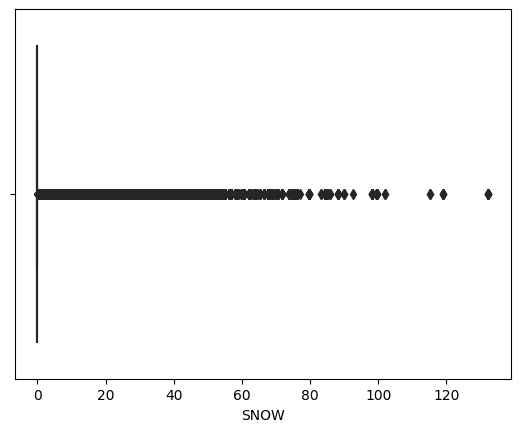

In [ ]:

##############IN THE DATAFRAME FOR THE YEAR 2014, WE DO SEE OUTLIERS. BUT WE CANNOT DIRECTLY ELIMINATE THEM AS THERE COULD BE SNOWFALLS DURING FEW MONTHS
#IN THE YEAR 2014

#data_frame_2015 = sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2015")]

#data_frame_2013=sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2013")]
#data_frame_2012=sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2012")]
data_frame_2014=sampled_data_without_2017[sampled_data_without_2017['acq_date'].str.startswith("2014")]

columns_with_outliers=[]
Q1 = data_frame_2014["SNOW"].quantile(0.25)
Q3 = data_frame_2014["SNOW"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

has_outliers = ((data_frame_2014["SNOW"] < lower_bound) | (data_frame_2014["SNOW"] > upper_bound)).any()
print(has_outliers)
sns.boxplot(x=data_frame_2014["SNOW"],color='Green')

In [ ]:
import pandas as pd
import seaborn as sns

#########Identify columns with outliers
columns_with_outliers = []


for column in sampled_data_without_2017.columns:
    if sampled_data_without_2017[column].dtype in ['int64', 'float64']:  # Check only numeric columns
        Q1 = sampled_data_without_2017[column].quantile(0.25)
        Q3 = sampled_data_without_2017[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        has_outliers = ((sampled_data_without_2017[column] < lower_bound) |
                        (sampled_data_without_2017[column] > upper_bound)).any()
        if has_outliers:
            columns_with_outliers.append(column)

In [ ]:
columns_with_outliers

['frp',
 'Neighbour_frp',
 'EVT_max',
 'EVT_min',
 'EVT_median',
 'EVT_sum',
 'EVT_mode',
 'EVT_count',
 'EVT_mean',
 'EVH_max',
 'EVH_min',
 'EVH_median',
 'EVH_sum',
 'EVH_mode',
 'EVH_count',
 'EVH_mean',
 'EVC_max',
 'EVC_min',
 'EVC_median',
 'EVC_sum',
 'EVC_mode',
 'EVC_count',
 'EVC_mean',
 'CBD_min',
 'CBD_sum',
 'CBD_count',
 'CBH_min',
 'CBH_sum',
 'CBH_count',
 'CC_sum',
 'CC_count',
 'CH_min',
 'CH_median',
 'CH_sum',
 'CH_mode',
 'CH_count',
 'CH_mean',
 'Neighbour_EVT_max',
 'Neighbour_EVT_min',
 'Neighbour_EVT_median',
 'Neighbour_EVT_sum',
 'Neighbour_EVT_mode',
 'Neighbour_EVT_count',
 'Neighbour_EVT_mean',
 'Neighbour_EVH_max',
 'Neighbour_EVH_min',
 'Neighbour_EVH_median',
 'Neighbour_EVH_sum',
 'Neighbour_EVH_mode',
 'Neighbour_EVH_count',
 'Neighbour_EVH_mean',
 'Neighbour_EVC_max',
 'Neighbour_EVC_min',
 'Neighbour_EVC_median',
 'Neighbour_EVC_sum',
 'Neighbour_EVC_mode',
 'Neighbour_EVC_count',
 'Neighbour_EVC_mean',
 'Neighbour_CBD_min',
 'Neighbour_CBD_sum',
 

In [ ]:
for column in columns_with_outliers:
    Q1 = sampled_data_without_2017[column].quantile(0.25)
    Q3 = sampled_data_without_2017[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ################################ Filter out outliers
    sampled_data_without_2017 = sampled_data_without_2017[(sampled_data_without_2017[column] >= lower_bound) &
                                                          (sampled_data_without_2017[column] <= upper_bound)]

print(sampled_data_without_2017.shape)

(61701, 115)


In [ ]:
##############HYPOTHESIS TESTING################
columns_to_drop = ["acq_time", "Shape","Neighbour_Shape","Neighbour_acq_time","TEMP_ave","ELEV_max","ELEV_min", "ELEV_median", "ELEV_sum","ELEV_mode","ELEV_count", "ELEV_mean", "SLP_max", "SLP_min","SLP_median", "SLP_sum", "SLP_mode", "SLP_count","SLP_mean" ,"Neighbour_ELEV_max","Neighbour_ELEV_min", "Neighbour_ELEV_median","Neighbour_ELEV_sum", "Neighbour_ELEV_mode","Neighbour_ELEV_count","Neighbour_ELEV_mean","Neighbour_SLP_max","Neighbour_SLP_min","Neighbour_SLP_median", "Neighbour_SLP_sum", "Neighbour_SLP_mode","Neighbour_SLP_count","Neighbour_SLP_mean"]

pd_df_test = data_2017.drop(columns=columns_to_drop)



In [ ]:
columns_to_drop = ["acq_time", "Shape","Neighbour_Shape","Neighbour_acq_time"]

pd_df_test = data_2017.drop(columns=columns_to_drop)



In [ ]:
pd_df_test.head()


,Polygon_ID,acq_date,frp,Neighbour,Neighbour_frp,ELEV_max,ELEV_min,ELEV_median,ELEV_sum,ELEV_mode,ELEV_count,ELEV_mean,SLP_max,SLP_min,SLP_median,SLP_sum,SLP_mode,SLP_count,SLP_mean,EVT_max,EVT_min,EVT_median,EVT_sum,EVT_mode,EVT_count,EVT_mean,EVH_max,EVH_min,EVH_median,EVH_sum,EVH_mode,EVH_count,EVH_mean,EVC_max,EVC_min,EVC_median,EVC_sum,EVC_mode,EVC_count,EVC_mean,CBD_max,CBD_min,CBD_median,CBD_sum,CBD_mode,CBD_count,CBD_mean,CBH_max,CBH_min,CBH_median,CBH_sum,CBH_mode,CBH_count,CBH_mean,CC_max,CC_min,CC_median,CC_sum,CC_mode,CC_count,CC_mean,CH_max,CH_min,CH_median,CH_sum,CH_mode,CH_count,CH_mean,c_latitude,c_longitude,Neighbour_ELEV_max,Neighbour_ELEV_min,Neighbour_ELEV_median,Neighbour_ELEV_sum,Neighbour_ELEV_mode,Neighbour_ELEV_count,Neighbour_ELEV_mean,Neighbour_SLP_max,Neighbour_SLP_min,Neighbour_SLP_median,Neighbour_SLP_sum,Neighbour_SLP_mode,Neighbour_SLP_count,Neighbour_SLP_mean,Neighbour_EVT_max,Neighbour_EVT_min,Neighbour_EVT_median,Neighbour_EVT_sum,Neighbour_EVT_mode,Neighbour_EVT_count,Neighbour_EVT_mean,Neighbour_EVH_max,Neighbour_EVH_min,Neighbour_EVH_median,Neighbour_EVH_sum,Neighbour_EVH_mode,Neighbour_EVH_count,Neighbour_EVH_mean,Neighbour_EVC_max,Neighbour_EVC_min,Neighbour_EVC_median,Neighbour_EVC_sum,Neighbour_EVC_mode,Neighbour_EVC_count,Neighbour_EVC_mean,Neighbour_CBD_max,Neighbour_CBD_min,Neighbour_CBD_median,Neighbour_CBD_sum,Neighbour_CBD_mode,Neighbour_CBD_count,Neighbour_CBD_mean,Neighbour_CBH_max,Neighbour_CBH_min,Neighbour_CBH_median,Neighbour_CBH_sum,Neighbour_CBH_mode,Neighbour_CBH_count,Neighbour_CBH_mean,Neighbour_CC_max,Neighbour_CC_min,Neighbour_CC_median,Neighbour_CC_sum,Neighbour_CC_mode,Neighbour_CC_count,Neighbour_CC_mean,Neighbour_CH_max,Neighbour_CH_min,Neighbour_CH_median,Neighbour_CH_sum,Neighbour_CH_mode,Neighbour_CH_count,Neighbour_CH_mean,Neighbour_c_latitude,Neighbour_c_longitude,TEMP_ave,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
8,49940881,2017-03-02,10.5,49933138.0,NaN,253.0,229.0,236.0,40124.0,251.0,169.0,237.42012,7.0,0.0,6.0,568.0,0.0,169.0,3.360947,366.0,143.0,350.0,41991.0,161.0,169.0,248.467450,308.0,110.0,304.0,34235.0,305.0,169.0,202.573960,7977.0,7304.0,7364.0,1301169.0,7304.0,169.0,7699.2246,100.0,0.0,100.0,7888.0,0.0,169.0,46.674557,17.0,0.0,1.0,252.0,0.0,169.0,1.491124,75.0,0.0,0.0,5110.0,0.0,169.0,30.236687,190.0,0.0,0.0,12540.0,0.0,169.0,74.201190,6.282376e+04,1.304880e+06,245.0,225.0,236.0,33217.0,242.0,144.0,230.673610,8.0,0.0,2.0,498.0,0.0,144.0,3.458333,364.0,13.0,100.5,21190.0,161.0,144.0,147.15277,308.0,13.0,61.0,15766.0,302.0,144.0,109.486115,9823.0,7296.0,8270.5,1146000.0,7908.0,144.0,7958.3335,100.0,0.0,50.0,7735.0,0.0,144.0,53.715280,24.0,0.0,5.0,402.0,0.0,144.0,2.791667,85.0,0.0,55.0,6390.0,0.0,144.0,44.375000,230.0,0.0,150.0,15620.0,0.0,144.0,108.472220,6.244876e+04,1.305255e+06,NaN,7.5,-2.8,18.9,0.0,0.0,NaN,2.5,1029.9
10,44484520,2017-11-23,0.9,44492262.0,NaN,123.0,111.0,121.5,16975.0,111.0,144.0,117.88194,5.0,0.0,2.0,279.0,0.0,144.0,1.937500,382.0,11.0,363.5,38812.0,242.0,144.0,269.527770,305.0,11.0,164.0,32601.0,305.0,144.0,226.395830,9825.0,7292.0,8381.5,1196699.0,9325.0,144.0,8310.4100,100.0,0.0,0.0,630.0,0.0,144.0,4.375000,1.0,0.0,0.0,9.0,0.0,144.0,0.062500,55.0,0.0,0.0,365.0,0.0,144.0,2.534722,150.0,0.0,0.0,830.0,0.0,144.0,5.763889,-2.015512e+05,6.490054e+05,131.0,122.0,128.5,19882.0,126.0,156.0,127.448715,3.0,0.0,1.0,202.0,0.0,156.0,1.294872,381.0,17.0,136.5,36093.0,251.0,156.0,231.36539,304.0,17.0,256.0,30824.0,206.0,156.0,197.589740,9825.0,7295.0,7390.0,1242530.0,9325.0,156.0,7964.9360,46.0,0.0,0.0,46.0,0.0,156.0,0.294872,1.0,0.0,0.0,1.0,0.0,156.0,0.006410,35.0,0.0,0.0,35.0,0.0,156.0,0.224359,70.0,0.0,0.0,70.0,0.0,156.0,0.448718,-2.011762e+05,6.490054e+05,NaN,10.4,1.5,21.6,0.0,0.0,NaN,1.5,1021.2
12,51156514,2017-03-23,8.4,51164257.0,NaN,275.0,237.0,255.5,37402.0,251.0,144.0,259.73610,12.0,1.0,7.5,1024.0,6.0,144.0,7.111111,176.0,25.0,172.0,23247.0,170.0,144.0,161.437500,119.0,25.0,114.5,15643.0,117.0,144.0,108.631940,9

In [ ]:
#########Lets us next split the values
pd_df_test['frp'] = pd_df_test['frp'].str.split(',').str[0]
pd_df_test['Neighbour_frp'] = pd_df_test['Neighbour_frp'].str.split(',').str[0]

In [ ]:
columns_to_drop = ["TEMP_ave"]
pd_df_test = pd_df_test.drop(columns=columns_to_drop)

In [ ]:
columns_with_null_test =pd_df_test.columns[pd_df_test.isnull().any()].tolist()

print(len(columns_with_null_test))

74


In [ ]:
#############mean values replacement#################. From the past research papers we found that median replacement is
#robust to outliers###########################################################

for feature in mean_values_train.index:


      if feature in pd_df_test.columns:
         pd_df_test[feature].fillna(mean_values_train[feature], inplace=True)


In [ ]:
############median values replacement
for feature in median_values_train.index:


      if feature in pd_df_test.columns:
         pd_df_test[feature].fillna(median_values_train[feature], inplace=True)

In [ ]:
columns_with_null_test =pd_df_test.columns[pd_df_test.isnull().any()].tolist()

print(len(columns_with_null_test))

0


In [ ]:
pd_df_test.head()

,Polygon_ID,acq_date,frp,Neighbour,Neighbour_frp,EVT_max,EVT_min,EVT_median,EVT_sum,EVT_mode,EVT_count,EVT_mean,EVH_max,EVH_min,EVH_median,EVH_sum,EVH_mode,EVH_count,EVH_mean,EVC_max,EVC_min,EVC_median,EVC_sum,EVC_mode,EVC_count,EVC_mean,CBD_max,CBD_min,CBD_median,CBD_sum,CBD_mode,CBD_count,CBD_mean,CBH_max,CBH_min,CBH_median,CBH_sum,CBH_mode,CBH_count,CBH_mean,CC_max,CC_min,CC_median,CC_sum,CC_mode,CC_count,CC_mean,CH_max,CH_min,CH_median,CH_sum,CH_mode,CH_count,CH_mean,c_latitude,c_longitude,Neighbour_EVT_max,Neighbour_EVT_min,Neighbour_EVT_median,Neighbour_EVT_sum,Neighbour_EVT_mode,Neighbour_EVT_count,Neighbour_EVT_mean,Neighbour_EVH_max,Neighbour_EVH_min,Neighbour_EVH_median,Neighbour_EVH_sum,Neighbour_EVH_mode,Neighbour_EVH_count,Neighbour_EVH_mean,Neighbour_EVC_max,Neighbour_EVC_min,Neighbour_EVC_median,Neighbour_EVC_sum,Neighbour_EVC_mode,Neighbour_EVC_count,Neighbour_EVC_mean,Neighbour_CBD_max,Neighbour_CBD_min,Neighbour_CBD_median,Neighbour_CBD_sum,Neighbour_CBD_mode,Neighbour_CBD_count,Neighbour_CBD_mean,Neighbour_CBH_max,Neighbour_CBH_min,Neighbour_CBH_median,Neighbour_CBH_sum,Neighbour_CBH_mode,Neighbour_CBH_count,Neighbour_CBH_mean,Neighbour_CC_max,Neighbour_CC_min,Neighbour_CC_median,Neighbour_CC_sum,Neighbour_CC_mode,Neighbour_CC_count,Neighbour_CC_mean,Neighbour_CH_max,Neighbour_CH_min,Neighbour_CH_median,Neighbour_CH_sum,Neighbour_CH_mode,Neighbour_CH_count,Neighbour_CH_mean,Neighbour_c_latitude,Neighbour_c_longitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
8,49940881,2017-03-02,10.5,49933138.0,2.4,366.0,143.0,350.0,41991.0,161.0,169.0,248.467450,308.0,110.0,304.0,34235.0,305.0,169.0,202.573960,7977.0,7304.0,7364.0,1301169.0,7304.0,169.0,7699.2246,100.0,0.0,100.0,7888.0,0.0,169.0,46.674557,17.0,0.0,1.0,252.0,0.0,169.0,1.491124,75.0,0.0,0.0,5110.0,0.0,169.0,30.236687,190.0,0.0,0.0,12540.0,0.0,169.0,74.201190,6.282376e+04,1.304880e+06,364.0,13.0,100.5,21190.0,161.0,144.0,147.15277,308.0,13.0,61.0,15766.0,302.0,144.0,109.486115,9823.0,7296.0,8270.5,1146000.0,7908.0,144.0,7958.3335,100.0,0.0,50.0,7735.0,0.0,144.0,53.715280,24.0,0.0,5.0,402.0,0.0,144.0,2.791667,85.0,0.0,55.0,6390.0,0.0,144.0,44.375000,230.0,0.0,150.0,15620.0,0.0,144.0,108.472220,6.244876e+04,1.305255e+06,7.5,-2.8,18.9,0.0,0.0,195.7,2.5,1029.9
10,44484520,2017-11-23,0.9,44492262.0,2.4,382.0,11.0,363.5,38812.0,242.0,144.0,269.527770,305.0,11.0,164.0,32601.0,305.0,144.0,226.395830,9825.0,7292.0,8381.5,1196699.0,9325.0,144.0,8310.4100,100.0,0.0,0.0,630.0,0.0,144.0,4.375000,1.0,0.0,0.0,9.0,0.0,144.0,0.062500,55.0,0.0,0.0,365.0,0.0,144.0,2.534722,150.0,0.0,0.0,830.0,0.0,144.0,5.763889,-2.015512e+05,6.490054e+05,381.0,17.0,136.5,36093.0,251.0,156.0,231.36539,304.0,17.0,256.0,30824.0,206.0,156.0,197.589740,9825.0,7295.0,7390.0,1242530.0,9325.0,156.0,7964.9360,46.0,0.0,0.0,46.0,0.0,156.0,0.294872,1.0,0.0,0.0,1.0,0.0,156.0,0.006410,35.0,0.0,0.0,35.0,0.0,156.0,0.224359,70.0,0.0,0.0,70.0,0.0,156.0,0.448718,-2.011762e+05,6.490054e+05,10.4,1.5,21.6,0.0,0.0,195.7,1.5,1021.2
12,51156514,2017-03-23,8.4,51164257.0,2.4,176.0,25.0,172.0,23247.0,170.0,144.0,161.437500,119.0,25.0,114.5,15643.0,117.0,144.0,108.631940,9322.0,7197.0,8313.0,1264040.0,9322.0,144.0,8778.0560,100.0,0.0,32.0,4946.0,0.0,144.0,34.347220,22.0,0.0,22.0,2585.0,0.0,144.0,17.951390,85.0,0.0,75.0,9990.0,0.0,144.0,69.375000,190.0,0.0,190.0,25060.0,0.0,144.0,174.027770,1.216988e+05,1.252755e+06,179.0,153.0,173.0,28558.0,161.0,169.0,168.98225,118.0,113.0,118.0,19491.0,117.0,169.0,115.331360,9322.0,7304.0,7367.0,1405214.0,9322.0,169.0,8314.8760,100.0,32.0,100.0,8590.0,37.0,169.0,50.828403,22.0,1.0,22.0,2687.0,1.0,169.0,15.899408,75.0,55.0,75.0,12495.0,75.0,169.0,73.934910,190.0,190.0,190.0,32110.0,190.0,169.0,190.000000,1.220738e+05,1.252380e+06,19.0,11.1,28.3,0.0,0.0,118.1,13.1,1018.0
15,59175839,2017-07-07,1.5,59168098.0,2.4,24.0,23.0,24.0,3738.0,24.0,156.0,23.961538,24.0,23.0,24.0,3738.0,24.0,156.0,23.961538,7298.0,7297.0,7298.0,1138482.0,7297.0,156.0,7297.9614,0.0,0.0,0.0,0.0,0.0,1

In [ ]:
NOTE:
###########pd_df is train
####pdf_df is test set

In [ ]:
print(len(pd_df_test))

1047826


In [ ]:
##############replace the null values with imputed mean of the column#####

In [ ]:
######WHILE TRAINING THE MODEL WE CAN ELIMINATE THE BELOW COLUMNS:

POLYGON_ID
Neighbour
c_latitude
c_longitude
Neighbour_c_latitude
Neighbour_c_longitude

NameError: ignored

In [ ]:
columns_to_drop = ["Polygon_ID", "Neighbour","Neighbour_c_longitude","Neighbour_c_longitude","c_latitude","c_longitude"]

pd_df_train = sampled_data_without_2017.drop(columns=columns_to_drop)

In [ ]:
columns_to_drop = ["Polygon_ID", "Neighbour","Neighbour_c_longitude","Neighbour_c_longitude","c_latitude","c_longitude"]

pd_df_test = pd_df_test.drop(columns=columns_to_drop)

In [ ]:
pd_df_train.head()

,acq_date,frp,Neighbour_frp,ELEV_max,ELEV_min,ELEV_median,ELEV_sum,ELEV_mode,ELEV_count,ELEV_mean,...,Neighbour_CH_mean,Neighbour_c_latitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
0,2012-09-06,3.4,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,264.743600,-2.099051e+06,25.8,14.3,28.4,0.0,0.0,176.0,10.1,1012.3
1,2016-02-13,1.0,2.4,67.0,59.0,60.5,20684.0,66.0,338.0,61.195267,...,122.777780,1.191949e+06,9.1,4.5,14.1,0.0,0.0,334.8,14.2,1026.0
2,2012-06-29,1.0,2.4,2570.0,2478.0,2526.5,788498.0,2485.0,312.0,2527.237000,...,112.326385,-1.172801e+06,25.9,11.1,36.7,0.0,0.0,195.7,6.9,1011.0
3,2015-12-05,9.5,2.4,135.0,99.0,103.0,16556.0,111.0,144.0,114.972220,...,185.416670,2.143238e+05,7.7,1.3,17.6,0.0,0.0,195.7,2.2,1030.7
4,2016-04-02,6.9,2.4,368.0,282.0,306.0,53377.0,305.0,169.0,315.840240,...,190.000000,2.274488e+05,11.0,2.2,20.0,0.0,0.0,269.5,7.4,1019.8


In [ ]:
pd_df_test.head()

,acq_date,frp,Neighbour_frp,ELEV_max,ELEV_min,ELEV_median,ELEV_sum,ELEV_mode,ELEV_count,ELEV_mean,...,Neighbour_CH_mean,Neighbour_c_latitude,TEMP_min,TEMP_max,PRCP,SNOW,WDIR_ave,WSPD_ave,PRES_ave,WCOMP
8,2017-03-02,10.5,2.4,253.0,229.0,236.0,40124.0,251.0,169.0,237.42012,...,108.472220,6.244876e+04,7.5,-2.8,18.9,0.0,0.0,195.7,2.5,1029.9
10,2017-11-23,0.9,2.4,123.0,111.0,121.5,16975.0,111.0,144.0,117.88194,...,0.448718,-2.011762e+05,10.4,1.5,21.6,0.0,0.0,195.7,1.5,1021.2
12,2017-03-23,8.4,2.4,275.0,237.0,255.5,37402.0,251.0,144.0,259.73610,...,190.000000,1.220738e+05,19.0,11.1,28.3,0.0,0.0,118.1,13.1,1018.0
15,2017-07-07,1.5,2.4,136.0,135.0,135.0,21079.0,135.0,156.0,135.12180,...,0.000000,5.098238e+05,29.6,25.0,36.1,0.0,0.0,279.9,16.9,1013.4
19,2017-08-17,2.1,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,246.538470,-2.042426e+06,18.8,9.1,26.7,0.0,0.0,305.8,5.8,1013.1


In [ ]:
########### now we can also drop the acquired time as well#########
columns_to_drop = ["acq_date"]

pd_df_train_final = pd_df_train.drop(columns=columns_to_drop)


In [ ]:
columns_to_drop =["acq_date"]

pd_df_test_final = pd_df_test.drop(columns=columns_to_drop)

In [ ]:
X_test=pd_df_test_final.loc[:, pd_df_test_final.columns!='Neighbour_frp']
y_test=pd_df_test_final['Neighbour_frp']

In [ ]:
X_test=pd_df_test_final.loc[:, pd_df_test_final.columns!='Neighbour_frp']
y_test=pd_df_test_final['Neighbour_frp']

In [ ]:
import numpy as np

In [ ]:

###########CONVERSION TO FLOAT BEFORE USING THE DATASET FOR FURTHER PROCESSING#######
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float64)

In [ ]:
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float64)

In [ ]:
X=pd_df_train_final.loc[:, pd_df_train_final.columns!='Neighbour_frp']
y=pd_df_train_final['Neighbour_frp']

In [ ]:
y_test

In [ ]:
#############FUNCTIONS TO HAVE ALL THE EVALUATION METRICS###################

from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf
import numpy as np

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:


#40.68852273384936 and parameters: {'n_estimators': 44, 'max_depth': 10
rf = RandomForestRegressor(n_estimators=44,max_depth=10)
rf.fit(X_train, y_train)

predictions_train = rf.predict(X_train)
predictions = rf.predict(X_val)
predictions_test=rf.predict(X_test)

In [ ]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)



Train set evaluation:
_____________________________________
MAE: 0.8299787
MSE: 39.372467
RMSE: 6.2747483
R2 Square 0.17408534682161247
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8480161752040625
MSE: 42.834979744316534
RMSE: 6.54484375247542
R2 Square 0.021859958585113803
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2493571
MSE: 81.52263
RMSE: 9.028988
R2 Square -0.048937210116320795
__________________________________


In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf
import numpy as np
####################### Convert data to cuDF DataFrame for optimal performance with cuML
X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)

################################### Split the data
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=22)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
rf = RandomForestRegressor(n_estimators=44,max_depth=10)
rf.fit(X_train, y_train)

predictions_train = rf.predict(X_train)
predictions = rf.predict(X_val)
predictions_test=rf.predict(X_test)

In [ ]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.8327706
MSE: 40.00534
RMSE: 6.3249774
R2 Square 0.17200418133204443
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8469166692289843
MSE: 41.53932309856042
RMSE: 6.445100705075168
R2 Square 0.01771248841953843
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2616636
MSE: 82.742905
RMSE: 9.0963125
R2 Square -0.06463847674251344
__________________________________


In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf
import numpy as np

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=10)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
rf = RandomForestRegressor(n_estimators=44,max_depth=10)
rf.fit(X_train, y_train)

predictions_train = rf.predict(X_train)
predictions = rf.predict(X_val)
predictions_test=rf.predict(X_test)

In [ ]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.82673633
MSE: 38.85862
RMSE: 6.2336683
R2 Square 0.16263922177515422
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8500145798193488
MSE: 45.12027841024157
RMSE: 6.717162973327472
R2 Square 0.0347498722092241
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2369322
MSE: 79.92111
RMSE: 8.939861
R2 Square -0.028331041646051602
__________________________________


In [ ]:
###############LINEAR REGRESSION#################
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf


X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)




In [ ]:
from cuml.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions = lr.predict(X_val)
predictions_test=lr.predict(X_test)

/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


In [ ]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

predictions_test = lr.predict(X_test)
cpu_data = predictions_test.values_host
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)

Train set evaluation:
_____________________________________
MAE: 0.9748609701574502
MSE: 47.24122217838981
RMSE: 6.873225020206294
R2 Square 0.009022651017364658
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9720173679902016
MSE: 43.369607194464464
RMSE: 6.585560507235847
R2 Square 0.009651699836056848
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2413286108370691
MSE: 77.16172962465107
RMSE: 8.784174954123527
R2 Square 0.007173484653647977
__________________________________


In [ ]:
############seed2
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=22)




In [ ]:
from cuml.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions = lr.predict(X_val)
predictions_test=lr.predict(X_test)

/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


In [ ]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

predictions_test = lr.predict(X_test)
cpu_data = predictions_test.values_host
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)

Train set evaluation:
_____________________________________
MAE: 0.9765335454066161
MSE: 47.88380532294405
RMSE: 6.91981252079448
R2 Square 0.008942533485173931
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9690742209928926
MSE: 41.87018250361897
RMSE: 6.4707173098211435
R2 Square 0.009888599212032001
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.237516206506825
MSE: 77.16244072008296
RMSE: 8.784215429967718
R2 Square 0.007164335112766151
__________________________________


In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [ ]:
############seed3
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)




In [ ]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
from cuml.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions = lr.predict(X_val)
predictions_test=lr.predict(X_test)

/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


In [ ]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

predictions_test = lr.predict(X_test)
cpu_data = predictions_test.values_host
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)

Train set evaluation:
_____________________________________
MAE: 0.9740951607076148
MSE: 46.429853885516906
RMSE: 6.8139455446545
R2 Square 0.009180343480194142
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9740006192339034
MSE: 45.262841446426684
RMSE: 6.727766453023372
R2 Square 0.009247378562485142
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2484691900055411
MSE: 77.1616245229649
RMSE: 8.784168971676541
R2 Square 0.007174836978710575
__________________________________


In [ ]:
#################Ridge regression ##################
from cuml.linear_model import LogisticRegression # Logisitc

In [ ]:
############seed1
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf




In [ ]:
print(X_val.shape)

(1185653, 108)


In [ ]:
###########NOTE: WE WILL USE THE SCALING AS THE ALGORITHMS SUCH AS LASSO AND RIDGE REGRESSION REQUIRE SCALING####

In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf



X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)

scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=32)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=0.58874446868423)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train.to_numpy())
predictions_train = ridge_model.predict(X_train_scaled)
predictions = ridge_model.predict(X_val_scaled)
predictions_test=ridge_model.predict(X_test_scaled)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.9682243
MSE: 46.61441
RMSE: 6.8274746
R2 Square 0.009016830541420218
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9754029460221045
MSE: 44.83271761275624
RMSE: 6.69572383038281
R2 Square 0.009632113623231353
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2360965
MSE: 77.16209
RMSE: 8.784195
R2 Square 0.007168997076852701
__________________________________


In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)

scaler = StandardScaler()


X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=0.58874446868423)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train.to_numpy())
predictions_train = ridge_model.predict(X_train_scaled)
predictions = ridge_model.predict(X_val_scaled)
predictions_test=ridge_model.predict(X_test_scaled)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.97406805
MSE: 46.429863
RMSE: 6.8139462
R2 Square 0.009180069170761862
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9739646514045045
MSE: 45.26277410492583
RMSE: 6.727761448277267
R2 Square 0.009248852592094625
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2484463
MSE: 77.161575
RMSE: 8.784166
R2 Square 0.007175310613055319
__________________________________


In [ ]:
scaler = StandardScaler()

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=0.58874446868423)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train.to_numpy())
predictions_train = ridge_model.predict(X_train_scaled)
predictions = ridge_model.predict(X_val_scaled)
predictions_test=ridge_model.predict(X_test_scaled)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.974837
MSE: 47.241238
RMSE: 6.873226
R2 Square 0.009022390497724686
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9719933154546212
MSE: 43.36956931555777
RMSE: 6.585557631329163
R2 Square 0.009652564803790842
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2412884
MSE: 77.161705
RMSE: 8.784174
R2 Square 0.007173871519846053
__________________________________


In [ ]:
##########OPTUNA FOR THE HYPERPARAMETER OPTIMIZATION####
####WE USE THE VALIDATION Score (MSE/ANY METRIC) FOR TUNING THE HYPERPARAMETERS OF THE MODELS

In [ ]:
import optuna
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf


################# Define the objective function for Optuna
def objective(trial):
    # Split the data


    ##################### Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 1, 50)
    max_depth = trial.suggest_int('max_depth', 2, 10, log=True)

    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    rf.fit(X_train, y_train)

    # Make predictions and calculate an evaluation metric
    predictions = rf.predict(X_val)
    mse = ((y_val - predictions) ** 2).mean()

    return mse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

## Best hyperparameters are obtained after the trial is completed
print(study.best_params)


[I 2023-11-17 16:02:22,036] A new study created in memory with name: no-name-b219cdc2-d5bd-422b-8a3e-aec2a979f5e4
[I 2023-11-17 16:02:28,006] Trial 0 finished with value: 41.834073996480974 and parameters: {'n_estimators': 17, 'max_depth': 3}. Best is trial 0 with value: 41.834073996480974.
/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
[I 2023-11-17 16:02:31,052] Trial 1 finished with value: 41.875566717715564 and parameters: {'n_estimators': 12, 'max_depth': 2}. Best is trial 0 with value: 41.834073996480974.
/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
[I 2023-11-17 16:02:45,470] Trial 2 finished with value: 41.768519613384484 and parameters: {'n_estimators': 40, 'max_depth': 4}. Best is trial 2 with v

{'n_estimators': 47, 'max_depth': 10}


In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=56)


In [ ]:
from cuml import ForestInference
import xgboost as xgb

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
import cudf

##########loguniform and suggest_uniform is not used anymore.
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5,log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)


    xgb_model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        tree_method='gpu_hist'
    )
    xgb_model.fit(X_train, y_train)


    predictions = xgb_model.predict(X_val)
    predictions1 = predictions.astype('float64')
    y_val1 = y_val.to_numpy()
    mse = ((y_val1 - predictions1) ** 2).mean()

    return mse




study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(study.best_params)


[I 2023-11-20 22:23:53,869] A new study created in memory with name: no-name-13283ba2-6dc8-47ef-aae1-82d751abe26a
[I 2023-11-20 22:24:01,849] Trial 0 finished with value: 46.100292223821114 and parameters: {'n_estimators': 69, 'max_depth': 14, 'learning_rate': 0.04346996473440653, 'subsample': 0.9639569072850214, 'colsample_bytree': 0.6560149011917552}. Best is trial 0 with value: 46.100292223821114.
[I 2023-11-20 22:24:11,819] Trial 1 finished with value: 47.50411076032966 and parameters: {'n_estimators': 79, 'max_depth': 15, 'learning_rate': 0.01815424697070465, 'subsample': 0.6449060647209913, 'colsample_bytree': 0.9253165421103534}. Best is trial 0 with value: 46.100292223821114.
[I 2023-11-20 22:24:12,562] Trial 2 finished with value: 52.228007771706714 and parameters: {'n_estimators': 22, 'max_depth': 6, 'learning_rate': 0.01672983206209416, 'subsample': 0.9557147983325038, 'colsample_bytree': 0.8840266173497313}. Best is trial 0 with value: 46.100292223821114.
[I 2023-11-20 22:2

{'n_estimators': 67, 'max_depth': 15, 'learning_rate': 0.04928440005096458, 'subsample': 0.7302439545916166, 'colsample_bytree': 0.5855867426188691}


In [ ]:


from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=26)



XGBoost_reg = xgb.XGBRegressor(n_estimators=67,max_depth=15,learning_rate=0.04928440005096458,subsample= 0.7302439545916166,colsample_bytree= 0.5855867426188691)
XGBoost_reg.fit(X_train, y_train)




Test set evaluation:
_____________________________________


TypeError: ignored

In [ ]:
predictions = XGBoost_reg.predict(X_val)
predictions_train = XGBoost_reg.predict(X_train)
predictions_test = XGBoost_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)


Train set evaluation:
_____________________________________
MAE: 0.6729122741658471
MSE: 19.961182105406355
RMSE: 4.467793874543269
R2 Square 0.5759925478885661
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8034977994173872
MSE: 40.82368123405302
RMSE: 6.389341220662192
R2 Square 0.09638248863893206
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.1743454180175885
MSE: 79.38956686539657
RMSE: 8.910082315298585
R2 Square -0.02149171011563844
__________________________________


In [ ]:


from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=46)



XGBoost_reg = xgb.XGBRegressor(n_estimators=67,max_depth=15,learning_rate=0.04928440005096458,subsample= 0.7302439545916166,colsample_bytree= 0.5855867426188691)
XGBoost_reg.fit(X_train, y_train)

predictions = XGBoost_reg.predict(X_val)
predictions_train = XGBoost_reg.predict(X_train)
predictions_test = XGBoost_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)


Train set evaluation:
_____________________________________
MAE: 0.6757809121183359
MSE: 20.42617097511356
RMSE: 4.5195321633011485
R2 Square 0.5608712023271933
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8024900879792095
MSE: 42.780359440785226
RMSE: 6.5406696477337265
R2 Square 0.07979263873004772
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.1510815179179041
MSE: 78.74917109560963
RMSE: 8.87407297105504
R2 Square -0.013251849440499619
__________________________________


In [ ]:


from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=56)



XGBoost_reg = xgb.XGBRegressor(n_estimators=67,max_depth=15,learning_rate=0.04928440005096458,subsample= 0.7302439545916166,colsample_bytree= 0.5855867426188691)
XGBoost_reg.fit(X_train, y_train)

predictions = XGBoost_reg.predict(X_val)
predictions_train = XGBoost_reg.predict(X_train)
predictions_test = XGBoost_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)


Train set evaluation:
_____________________________________
MAE: 0.673675207554422
MSE: 20.111133151717574
RMSE: 4.484543806421962
R2 Square 0.5531038110880915
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8049848065477416
MSE: 45.84986505457761
RMSE: 6.771252842316377
R2 Square 0.08339155829351363
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.1987356349791043
MSE: 79.27568796646581
RMSE: 8.903689570423365
R2 Square -0.020026450185298916
__________________________________


In [ ]:
import cuml
import xgboost as xgb

In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf
import numpy as np

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:

ridge_model = cuml.linear_model.Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)
rf = cuml.ensemble.RandomForestRegressor(n_estimators=47, max_depth=10)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist',n_estimators=67, max_depth=15,
learning_rate=0.04928440005096458,subsample=0.7302439545916166,
colsample_bytree=0.5855867426188691)
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5855867426188691, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04928440005096458,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=67, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
stacked_features_train = cudf.DataFrame({
    'rf': rf.predict(X_train),
    'xgb': xgb_model.predict(X_train),
    'ridge': ridge_model.predict(X_train_scaled)
})
stacked_features_val = cudf.DataFrame({
    'rf': rf.predict(X_val),
    'xgb': xgb_model.predict(X_val),
    'ridge': ridge_model.predict(X_val_scaled)
})
stacked_features_test = cudf.DataFrame({
    'rf': rf.predict(X_test),
    'xgb': xgb_model.predict(X_test),
    'ridge': ridge_model.predict(X_test_scaled)
})

In [ ]:
stacking_model= cuml.linear_model.Lasso(alpha=1)
stacking_model.fit(stacked_features_train, y_train)

Lasso()

In [ ]:
predictions = stacking_model.predict(stacked_features_val)
predictions_train = stacking_model.predict(stacked_features_train)
predictions_test = stacking_model.predict(stacked_features_test)
cpu_data_train = predictions_train.values_host
cpu_data_val= predictions.values_host
cpu_data_test = predictions_test.values_host
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),cpu_data_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),cpu_data_val)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data_test)

Train set evaluation:
_____________________________________
MAE: 0.7992365
MSE: 11.421811
RMSE: 3.379617
R2 Square 0.7604051310734735
__________________________________
Val set evaluation:
_____________________________________
MAE: 1.0672254510954735
MSE: 40.874572176628604
RMSE: 6.393322467749347
R2 Square 0.06662601545952518
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.7530671
MSE: 89.085526
RMSE: 9.438513
R2 Square -0.1462476339596237
__________________________________


In [ ]:
###########seed2#######
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=22)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:

ridge_model = cuml.linear_model.Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)
rf = cuml.ensemble.RandomForestRegressor(n_estimators=47, max_depth=10)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist',n_estimators=67, max_depth=15,
learning_rate=0.04928440005096458,subsample=0.7302439545916166,
colsample_bytree=0.5855867426188691)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5855867426188691, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04928440005096458,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=67, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
stacked_features_train = cudf.DataFrame({
    'rf': rf.predict(X_train),
    'xgb': xgb_model.predict(X_train),
    'ridge': ridge_model.predict(X_train_scaled)
})
stacked_features_val = cudf.DataFrame({
    'rf': rf.predict(X_val),
    'xgb': xgb_model.predict(X_val),
    'ridge': ridge_model.predict(X_val_scaled)
})
stacked_features_test = cudf.DataFrame({
    'rf': rf.predict(X_test),
    'xgb': xgb_model.predict(X_test),
    'ridge': ridge_model.predict(X_test_scaled)
})

In [ ]:
stacking_model= cuml.linear_model.Lasso(alpha=1)
stacking_model.fit(stacked_features_train, y_train)

Lasso()

In [ ]:
predictions = stacking_model.predict(stacked_features_val)
predictions_train = stacking_model.predict(stacked_features_train)
predictions_test = stacking_model.predict(stacked_features_test)
cpu_data_train = predictions_train.values_host
cpu_data_val= predictions.values_host
cpu_data_test = predictions_test.values_host
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),cpu_data_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),cpu_data_val)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data_test)

Train set evaluation:
_____________________________________
MAE: 0.8006005
MSE: 11.302303
RMSE: 3.3618898
R2 Square 0.766074778290961
__________________________________
Val set evaluation:
_____________________________________
MAE: 1.063093556116707
MSE: 38.74589937698704
RMSE: 6.22462042031376
R2 Square 0.0837690591957061
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.904204
MSE: 107.0145
RMSE: 10.344782
R2 Square -0.37693701186132045
__________________________________


In [ ]:
###########seed3#######

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:

ridge_model = cuml.linear_model.Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)
rf = cuml.ensemble.RandomForestRegressor(n_estimators=47, max_depth=10)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist',n_estimators=67, max_depth=15,
learning_rate=0.04928440005096458,subsample=0.7302439545916166,
colsample_bytree=0.5855867426188691)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5855867426188691, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04928440005096458,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=67, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
stacked_features_train = cudf.DataFrame({
    'rf': rf.predict(X_train),
    'xgb': xgb_model.predict(X_train),
    'ridge': ridge_model.predict(X_train_scaled)
})
stacked_features_val = cudf.DataFrame({
    'rf': rf.predict(X_val),
    'xgb': xgb_model.predict(X_val),
    'ridge': ridge_model.predict(X_val_scaled)
})
stacked_features_test = cudf.DataFrame({
    'rf': rf.predict(X_test),
    'xgb': xgb_model.predict(X_test),
    'ridge': ridge_model.predict(X_test_scaled)
})

In [ ]:
stacking_model= cuml.linear_model.LinearRegression()
stacking_model.fit(stacked_features_train, y_train)

/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression()

In [ ]:
predictions = stacking_model.predict(stacked_features_val)
predictions_train = stacking_model.predict(stacked_features_train)
predictions_test = stacking_model.predict(stacked_features_test)
cpu_data_train = predictions_train.values_host
cpu_data_val= predictions.values_host
cpu_data_test = predictions_test.values_host
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),cpu_data_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),cpu_data_val)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data_test)

Train set evaluation:
_____________________________________
MAE: 0.62614864
MSE: 9.774879
RMSE: 3.1264803
R2 Square 0.7914026800707927
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9342164445256763
MSE: 45.86077323776489
RMSE: 6.772058271881961
R2 Square -0.003840674921968157
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.7367568
MSE: 96.58645
RMSE: 9.827841
R2 Square -0.24276135043767377
__________________________________


In [ ]:
##################TESTING OF MODELS BEGINS HERE FOR DATA WITHOUT ELEVATION AND SLOPE INFORMATION
#################

In [ ]:
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf
import numpy as np

X_cudf = cudf.DataFrame(X)
y_cudf = cudf.Series(y)


X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)


In [ ]:
import optuna
from cuml.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cudf

def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 1, 50)
    max_depth = trial.suggest_int('max_depth', 2, 10, log=True)


    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    rf.fit(X_train, y_train)


    predictions = rf.predict(X_val)
    mse = ((y_val - predictions) ** 2).mean()

    return mse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(study.best_params)



[I 2023-11-21 20:01:06,736] A new study created in memory with name: no-name-8c9ea458-d170-4c51-8d64-59f2da9b5c7e
[I 2023-11-21 20:01:10,796] Trial 0 finished with value: 43.34456667442174 and parameters: {'n_estimators': 12, 'max_depth': 3}. Best is trial 0 with value: 43.34456667442174.
[I 2023-11-21 20:01:22,175] Trial 1 finished with value: 43.340878441749076 and parameters: {'n_estimators': 48, 'max_depth': 3}. Best is trial 1 with value: 43.340878441749076.
[I 2023-11-21 20:01:39,611] Trial 2 finished with value: 43.05706432855512 and parameters: {'n_estimators': 37, 'max_depth': 8}. Best is trial 2 with value: 43.05706432855512.
[I 2023-11-21 20:02:00,159] Trial 3 finished with value: 42.916033976619055 and parameters: {'n_estimators': 40, 'max_depth': 9}. Best is trial 3 with value: 42.916033976619055.
[I 2023-11-21 20:02:05,061] Trial 4 finished with value: 43.282679898593635 and parameters: {'n_estimators': 17, 'max_depth': 4}. Best is trial 3 with value: 42.916033976619055.


{'n_estimators': 50, 'max_depth': 10}


In [ ]:


rf = RandomForestRegressor(n_estimators=50,max_depth=10)
rf.fit(X_train, y_train)

predictions_train = rf.predict(X_train)
predictions = rf.predict(X_val)
predictions_test=rf.predict(X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.8321326
MSE: 39.965252
RMSE: 6.321808
R2 Square 0.1616508463181061
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8498784512694175
MSE: 42.759330167877486
RMSE: 6.539061872155477
R2 Square 0.02358742245396106
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2632972
MSE: 82.94567
RMSE: 9.107451
R2 Square -0.0672473918451979
__________________________________


In [ ]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=32)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:

rf = RandomForestRegressor(n_estimators=50,max_depth=10)
rf.fit(X_train, y_train)

predictions_train = rf.predict(X_train)
predictions = rf.predict(X_val)
predictions_test=rf.predict(X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)



Train set evaluation:
_____________________________________
MAE: 0.8284002
MSE: 39.928032
RMSE: 6.3188634
R2 Square 0.15116358992345968
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8550175216942827
MSE: 44.182235390973204
RMSE: 6.646971896358011
R2 Square 0.02400145675958476
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2277002
MSE: 79.31154
RMSE: 8.905703
R2 Square -0.02048806012466331
__________________________________


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:

rf = RandomForestRegressor(n_estimators=50,max_depth=10)
rf.fit(X_train, y_train)

predictions_train = rf.predict(X_train)
predictions = rf.predict(X_val)
predictions_test=rf.predict(X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)



Train set evaluation:
_____________________________________
MAE: 0.8335542
MSE: 39.471806
RMSE: 6.282659
R2 Square 0.15766557062415587
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8528108487541112
MSE: 44.30239894676935
RMSE: 6.656004728571739
R2 Square 0.030270383169957116
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2342012
MSE: 79.85368
RMSE: 8.936089
R2 Square -0.02746324559680202
__________________________________


In [ ]:
###############xgboost regressor is here###############
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=32)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
import cudf

##########loguniform and suggest_uniform is not used anymore.
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5,log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)


    xgb_model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        tree_method='gpu_hist'
    )
    xgb_model.fit(X_train, y_train)


    predictions = xgb_model.predict(X_val)
    predictions1 = predictions.astype('float64')
    y_val1 = y_val.to_numpy()
    mse = ((y_val1 - predictions1) ** 2).mean()

    return mse



study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


print(study.best_params)

[I 2023-11-21 20:43:45,554] A new study created in memory with name: no-name-b856dbe3-7feb-4107-97fc-778a545395ba
[I 2023-11-21 20:43:46,798] Trial 0 finished with value: 46.04524087607126 and parameters: {'n_estimators': 49, 'max_depth': 4, 'learning_rate': 0.015402000983286913, 'subsample': 0.9865953719772405, 'colsample_bytree': 0.9078327489484133}. Best is trial 0 with value: 46.04524087607126.
[I 2023-11-21 20:43:49,979] Trial 1 finished with value: 42.75968709782897 and parameters: {'n_estimators': 65, 'max_depth': 11, 'learning_rate': 0.04098166891813965, 'subsample': 0.9768048566793952, 'colsample_bytree': 0.6459964637902786}. Best is trial 1 with value: 42.75968709782897.
[I 2023-11-21 20:43:51,186] Trial 2 finished with value: 45.2181418217463 and parameters: {'n_estimators': 71, 'max_depth': 7, 'learning_rate': 0.4681893468116222, 'subsample': 0.9474132980703132, 'colsample_bytree': 0.9726334412419797}. Best is trial 1 with value: 42.75968709782897.
[I 2023-11-21 20:43:52,42

{'n_estimators': 100, 'max_depth': 13, 'learning_rate': 0.10392326647845473, 'subsample': 0.8695406321156233, 'colsample_bytree': 0.7716024236654152}


In [ ]:
XGBoost_reg = xgb.XGBRegressor(n_estimators=50,max_depth=13,learning_rate= 0.10392326647845473,subsample=  0.8695406321156233,colsample_bytree= 0.7716024236654152)
XGBoost_reg.fit(X_train, y_train)

predictions = XGBoost_reg.predict(X_val)
predictions_train = XGBoost_reg.predict(X_train)
predictions_test = XGBoost_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)

Train set evaluation:
_____________________________________
MAE: 0.6946687
MSE: 20.20789
RMSE: 4.4953184
R2 Square 0.5703973964998155
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8270578452889202
MSE: 42.01492672281269
RMSE: 6.481892217771959
R2 Square 0.07187794114654622
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.1180621
MSE: 80.79272
RMSE: 8.988477
R2 Square -0.039545942434614956
__________________________________


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
XGBoost_reg = xgb.XGBRegressor(n_estimators=50,max_depth=13,learning_rate= 0.10392326647845473,subsample=  0.8695406321156233,colsample_bytree= 0.7716024236654152)
XGBoost_reg.fit(X_train, y_train)

predictions = XGBoost_reg.predict(X_val)
predictions_train = XGBoost_reg.predict(X_train)
predictions_test = XGBoost_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)

Train set evaluation:
_____________________________________
MAE: 0.689102
MSE: 19.227837
RMSE: 4.384956
R2 Square 0.5896752373665666
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8239268665214673
MSE: 41.74771652410377
RMSE: 6.461247288573915
R2 Square 0.08618950416000881
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.1549569
MSE: 80.209915
RMSE: 8.955998
R2 Square -0.03204674594486967
__________________________________


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
XGBoost_reg = xgb.XGBRegressor(n_estimators=50,max_depth=13,learning_rate= 0.10392326647845473,subsample=  0.8695406321156233,colsample_bytree= 0.7716024236654152)
XGBoost_reg.fit(X_train, y_train)

predictions = XGBoost_reg.predict(X_val)
predictions_train = XGBoost_reg.predict(X_train)
predictions_test = XGBoost_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)

Train set evaluation:
_____________________________________
MAE: 0.69946617
MSE: 20.538492
RMSE: 4.5319414
R2 Square 0.5691649094815645
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.8220847172190461
MSE: 39.891783654858806
RMSE: 6.31599427286463
R2 Square 0.0890680665851249
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.1850142
MSE: 80.882835
RMSE: 8.993488
R2 Square -0.04070551929972366
__________________________________


In [ ]:
####################LINEAR REGRESSION MODELS ############

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=32)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
from cuml.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions = lr.predict(X_val)
predictions_test=lr.predict(X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

predictions_test = lr.predict(X_test)
cpu_data = predictions_test.values_host
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)


/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


Train set evaluation:
_____________________________________
MAE: 2.6550205
MSE: 56.209766
RMSE: 7.4973173
R2 Square -0.1949723162351631
__________________________________
Val set evaluation:
_____________________________________
MAE: 2.6611234483187256
MSE: 54.326734644037096
RMSE: 7.370667177673748
R2 Square -0.2000935082252946
__________________________________
Test set evaluation:
_____________________________________
MAE: 3.751124
MSE: 94.46657
RMSE: 9.719391
R2 Square -0.21548488089652285
__________________________________


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
from cuml.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions = lr.predict(X_val)
predictions_test=lr.predict(X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

predictions_test = lr.predict(X_test)
cpu_data = predictions_test.values_host
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)


/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


Train set evaluation:
_____________________________________
MAE: 8.985154
MSE: 194.0548
RMSE: 13.930355
R2 Square -3.1411578853043567
__________________________________
Val set evaluation:
_____________________________________
MAE: 8.988781967520605
MSE: 193.83615839559624
RMSE: 13.922505464017467
R2 Square -3.24285519695263
__________________________________
Test set evaluation:
_____________________________________
MAE: 9.643424
MSE: 225.93307
RMSE: 15.031071
R2 Square -1.9070415787967847
__________________________________


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [ ]:
from cuml.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions = lr.predict(X_val)
predictions_test=lr.predict(X_test)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train.values_host)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions.values_host)

predictions_test = lr.predict(X_test)
cpu_data = predictions_test.values_host
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data)


/usr/local/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


Train set evaluation:
_____________________________________
MAE: 1.4843732
MSE: 48.76914
RMSE: 6.9834905
R2 Square -0.0230283627262311
__________________________________
Val set evaluation:
_____________________________________
MAE: 1.4810728730320033
MSE: 44.88910142084997
RMSE: 6.69993294151889
R2 Square -0.025046067138458916
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.9936538
MSE: 80.32693
RMSE: 8.962529
R2 Square -0.03355257898441044
__________________________________


In [ ]:
#################RIDGE REGRESSION MODEL###########
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

In [ ]:
#############now we have scaled the model.Let us use optuna to find the hyperparameter alpha value
#for this dataset




In [ ]:
import optuna
import cuml
from cuml.linear_model import Ridge
from sklearn.model_selection import train_test_split
import cudf
import numpy as np



def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-3, 10.0, log=True)


    ridge_model = cuml.linear_model.Ridge(alpha=alpha)


    ridge_model.fit(X_train_scaled, y_train)


    predictions = ridge_model.predict(X_val_scaled)


    mse = ((y_val.to_numpy() - predictions) ** 2).mean()

    return mse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


print("Best hyperparameters: ", study.best_params)


[I 2023-11-21 21:57:28,712] A new study created in memory with name: no-name-401a4a7c-e47d-4765-9a15-54b9cc355c34
[I 2023-11-21 21:57:31,351] Trial 0 finished with value: 43.421728172934074 and parameters: {'alpha': 0.002649715922453239}. Best is trial 0 with value: 43.421728172934074.
[I 2023-11-21 21:57:32,755] Trial 1 finished with value: 43.42172744983098 and parameters: {'alpha': 0.021108353595282656}. Best is trial 1 with value: 43.42172744983098.
[I 2023-11-21 21:57:34,115] Trial 2 finished with value: 43.421728012366124 and parameters: {'alpha': 0.006749691773901443}. Best is trial 1 with value: 43.42172744983098.
[I 2023-11-21 21:57:35,650] Trial 3 finished with value: 43.421723243203566 and parameters: {'alpha': 0.22227653693179325}. Best is trial 3 with value: 43.421723243203566.
[I 2023-11-21 21:57:37,036] Trial 4 finished with value: 43.421727326805104 and parameters: {'alpha': 0.02454168391461828}. Best is trial 3 with value: 43.421723243203566.
[I 2023-11-21 21:57:38,404

Best hyperparameters:  {'alpha': 0.5887444686842307}


In [ ]:
################RIDGE REGRESSION BEGINS HERE#############
ridge_model = Ridge(alpha=0.58874446868423)  ########### alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)
predictions_train = ridge_model.predict(X_train_scaled)
predictions = ridge_model.predict(X_val_scaled)
predictions_test=ridge_model.predict(X_test_scaled)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.9760116
MSE: 47.30459
RMSE: 6.877833
R2 Square 0.007693375857845908
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9730426410257665
MSE: 43.421721626636675
RMSE: 6.589516038878475
R2 Square 0.008461662788122881
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2349043
MSE: 77.266975
RMSE: 8.790164
R2 Square 0.00581905631005919
__________________________________


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge_model = Ridge(alpha=0.58874446868423)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train.to_numpy())
predictions_train = ridge_model.predict(X_train_scaled)
predictions = ridge_model.predict(X_val_scaled)
predictions_test=ridge_model.predict(X_test_scaled)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.9761387
MSE: 46.488647
RMSE: 6.8182583
R2 Square 0.00792547555335299
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9760196558717121
MSE: 45.32520407706286
RMSE: 6.732399577941201
R2 Square 0.007882330814529381
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2414286
MSE: 77.26663
RMSE: 8.790144
R2 Square 0.005823661502170285
__________________________________


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge_model = Ridge(alpha=0.58874446868423)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train.to_numpy())
predictions_train = ridge_model.predict(X_train_scaled)
predictions = ridge_model.predict(X_val_scaled)
predictions_test=ridge_model.predict(X_test_scaled)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),predictions_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),predictions)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(),predictions_test)


Train set evaluation:
_____________________________________
MAE: 0.97589177
MSE: 47.30451
RMSE: 6.877827
R2 Square 0.007694775224814765
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9729330805226291
MSE: 43.421792260066695
RMSE: 6.589521398407224
R2 Square 0.00846004986834148
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.2342124
MSE: 77.267166
RMSE: 8.7901745
R2 Square 0.005816804036747669
__________________________________


In [ ]:
##############stacked ensemble of the models###############
###########NOTE: SCALING IS DONE FOR LASSO/RIDGE

In [ ]:

scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=32)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)


In [ ]:

ridge_model = cuml.linear_model.Ridge(alpha=0.58874446868423)
ridge_model.fit(X_train_scaled, y_train.to_numpy())
rf = cuml.ensemble.RandomForestRegressor(n_estimators=50, max_depth=10)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist',n_estimators=50, max_depth=13,
learning_rate=0.10392326647845473, subsample=0.8695406321156233,
colsample_bytree=0.7716024236654152)
xgb_model.fit(X_train, y_train)
stacked_features_train = cudf.DataFrame({
    'rf': rf.predict(X_train),
    'xgb': xgb_model.predict(X_train),
    'ridge': ridge_model.predict(X_train_scaled)
})
stacked_features_val = cudf.DataFrame({
    'rf': rf.predict(X_val),
    'xgb': xgb_model.predict(X_val),
    'ridge': ridge_model.predict(X_val_scaled)
})
stacked_features_test = cudf.DataFrame({
    'rf': rf.predict(X_test),
    'xgb': xgb_model.predict(X_test),
    'ridge': ridge_model.predict(X_test_scaled)
})



In [ ]:
stacking_model = cuml.linear_model.Lasso(alpha=0.58874446868423)


stacking_model.fit(stacked_features_train, y_train)
predictions = stacking_model.predict(stacked_features_val)
predictions_train = stacking_model.predict(stacked_features_train)
predictions_test = stacking_model.predict(stacked_features_test)
cpu_data_train = predictions_train.values_host
cpu_data_val= predictions.values_host
cpu_data_test = predictions_test.values_host
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),cpu_data_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),cpu_data_val)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data_test)


Train set evaluation:
_____________________________________
MAE: 0.72303796
MSE: 12.2704525
RMSE: 3.5029206
R2 Square 0.7391406204989108
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9781413052195238
MSE: 43.88673913160257
RMSE: 6.624706720421861
R2 Square 0.030529055830265994
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.495328
MSE: 94.86357
RMSE: 9.739793
R2 Square -0.22059291821195726
__________________________________


In [ ]:
scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=12)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge_model = cuml.linear_model.Ridge(alpha=0.58874446868423)
ridge_model.fit(X_train_scaled, y_train.to_numpy())
rf = cuml.ensemble.RandomForestRegressor(n_estimators=50, max_depth=10)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist',n_estimators=50, max_depth=13,
learning_rate=0.10392326647845473, subsample=0.8695406321156233,
colsample_bytree=0.7716024236654152)
xgb_model.fit(X_train, y_train)
stacked_features_train = cudf.DataFrame({
    'rf': rf.predict(X_train),
    'xgb': xgb_model.predict(X_train),
    'ridge': ridge_model.predict(X_train_scaled)
})
stacked_features_val = cudf.DataFrame({
    'rf': rf.predict(X_val),
    'xgb': xgb_model.predict(X_val),
    'ridge': ridge_model.predict(X_val_scaled)
})
stacked_features_test = cudf.DataFrame({
    'rf': rf.predict(X_test),
    'xgb': xgb_model.predict(X_test),
    'ridge': ridge_model.predict(X_test_scaled)
})

In [ ]:
stacking_model = cuml.linear_model.Lasso(alpha=0.58874446868423)


stacking_model.fit(stacked_features_train, y_train)
predictions = stacking_model.predict(stacked_features_val)
predictions_train = stacking_model.predict(stacked_features_train)
predictions_test = stacking_model.predict(stacked_features_test)
cpu_data_train = predictions_train.values_host
cpu_data_val= predictions.values_host
cpu_data_test = predictions_test.values_host
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),cpu_data_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),cpu_data_val)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data_test)


Train set evaluation:
_____________________________________
MAE: 0.7180579
MSE: 11.735956
RMSE: 3.4257782
R2 Square 0.7495530749384038
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9747352470228985
MSE: 44.76612390881026
RMSE: 6.690749129119269
R2 Square 0.020119966026750813
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.4806521
MSE: 94.95179
RMSE: 9.744321
R2 Square -0.221727985405346
__________________________________


In [ ]:
scaler = StandardScaler()

X_train, X_val, y_train, y_val = train_test_split(X_cudf, y_cudf, test_size=0.3, random_state=42)
X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)

y_test = pd.to_numeric(y_test, errors='coerce')
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_val_scaled = scaler.transform(X_val.to_pandas())
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge_model = cuml.linear_model.Ridge(alpha=0.58874446868423)
ridge_model.fit(X_train_scaled, y_train.to_numpy())
rf = cuml.ensemble.RandomForestRegressor(n_estimators=50, max_depth=10)
rf.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(tree_method='gpu_hist',n_estimators=50, max_depth=13,
learning_rate=0.10392326647845473, subsample=0.8695406321156233,
colsample_bytree=0.7716024236654152)
xgb_model.fit(X_train, y_train)
stacked_features_train = cudf.DataFrame({
    'rf': rf.predict(X_train),
    'xgb': xgb_model.predict(X_train),
    'ridge': ridge_model.predict(X_train_scaled)
})
stacked_features_val = cudf.DataFrame({
    'rf': rf.predict(X_val),
    'xgb': xgb_model.predict(X_val),
    'ridge': ridge_model.predict(X_val_scaled)
})
stacked_features_test = cudf.DataFrame({
    'rf': rf.predict(X_test),
    'xgb': xgb_model.predict(X_test),
    'ridge': ridge_model.predict(X_test_scaled)
})

In [ ]:
stacking_model = cuml.linear_model.Lasso(alpha=0.58874446868423)


stacking_model.fit(stacked_features_train, y_train)
predictions = stacking_model.predict(stacked_features_val)
predictions_train = stacking_model.predict(stacked_features_train)
predictions_test = stacking_model.predict(stacked_features_test)
cpu_data_train = predictions_train.values_host
cpu_data_val= predictions.values_host
cpu_data_test = predictions_test.values_host
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train.to_numpy(),cpu_data_train)
print('Val set evaluation:\n_____________________________________')
print_evaluate(y_val.to_numpy(),cpu_data_val)

cpu_data = predictions_test

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test.to_numpy(), cpu_data_test)


Train set evaluation:
_____________________________________
MAE: 0.7237331
MSE: 12.467397
RMSE: 3.53092
R2 Square 0.7384717251803135
__________________________________
Val set evaluation:
_____________________________________
MAE: 0.9738995422012837
MSE: 43.04791099043282
RMSE: 6.561090686039389
R2 Square 0.016997657280481193
__________________________________
Test set evaluation:
_____________________________________
MAE: 1.5680504
MSE: 94.420715
RMSE: 9.717032
R2 Square -0.21489519564965032
__________________________________
